# 1. Imports

In [2]:
%load_ext autoreload
%autoreload 2

# math and analysis
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Get Data

Temperature (°C): Average temperature of the region.

Humidity (%): Relative humidity recorded in the region.

PM2.5 Concentration (µg/m³): Fine particulate matter levels.

PM10 Concentration (µg/m³): Coarse particulate matter levels.

NO2 Concentration (ppb): Nitrogen dioxide levels.

SO2 Concentration (ppb): Sulfur dioxide levels.

CO Concentration (ppm): Carbon monoxide levels.

Proximity to Industrial Areas (km): Distance to the nearest industrial zone.

Population Density (people/km²): Number of people per square kilometer in the region.

Target Variable: Air Quality Levels

Good: Clean air with low pollution levels.

Moderate: Acceptable air quality but with some pollutants present.

Poor: Noticeable pollution that may cause health issues for sensitive groups.

Hazardous: Highly polluted air posing serious health risks to the population.

In [3]:
data = pd.read_csv('pollution_dataset.csv')
data

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            26.3      59.3    1.0   6.2  38.3  20.4  0.68   
2            27.9      73.2   20.0  39.4  19.6   5.8  0.95   
3            23.9      51.9   14.7  24.3   5.2  12.6  1.24   
4            25.2      59.0   26.3  30.9  26.8  13.5  1.06   
...           ...       ...    ...   ...   ...   ...   ...   
4995         29.3      36.8   80.3  90.9   9.2  14.1  0.97   
4996         15.7      51.7    0.7  11.4  40.5  13.8  1.07   
4997         27.8      48.1    8.9  16.4   8.6  17.7  0.54   
4998         30.4      50.4    2.2  18.8  13.1  22.3  0.94   
4999         21.5      76.5   45.0  58.0  37.9   0.0  0.96   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                              11.2                 314   Hazardous  
1                              13.5                 298        Good  
2                               5.4                 309        Good  
3                               4.5                 282        Poor  
4                               5.6                 293        Poor  
...                             ...                 ...         ...  
4995                           10.2                 287    Moderate  
4996                            4.2                 320        Good  
4997                            0.3                 302    Moderate  
4998                            6.7                 308    Moderate  
4999                            0.2                 290   Hazardous  

[5000 rows x 10 columns]

# 3. Data Exploration

In [4]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
data.describe(include='all').T

count unique   top  freq      mean        std  \
Temperature                    5000.0    NaN   NaN   NaN  25.46458   5.486219   
Humidity                       5000.0    NaN   NaN   NaN  60.06814  15.044806   
PM2.5                          5000.0    NaN   NaN   NaN  29.90558  30.285899   
PM10                           5000.0    NaN   NaN   NaN   40.0037  30.693124   
NO2                            5000.0    NaN   NaN   NaN  21.00036   11.30099   
SO2                            5000.0    NaN   NaN   NaN  15.14106   7.668466   
CO                             5000.0    NaN   NaN   NaN  0.904314    0.29784   
Proximity_to_Industrial_Areas  5000.0    NaN   NaN   NaN   5.03188   5.010352   
Population_Density             5000.0    NaN   NaN   NaN  299.9482  17.215133   
Air Quality                      5000      4  Good  2000       NaN        NaN   

                                 min    25%    50%    75%    max  
Temperature                      3.5   21.8   25.3   28.9   46.2  
Humidity                        10.0   49.9   60.2   70.1  100.0  
PM2.5                            0.0    8.5   20.6   41.5  249.0  
PM10                            -1.4   18.9   31.1   51.5  256.1  
NO2                            -13.5   13.8   20.5   27.5   96.4  
SO2                              0.0    9.9   15.1   20.4   41.7  
CO                             -0.08    0.7  0.905    1.1   2.14  
Proximity_to_Industrial_Areas    0.0    1.5    3.5    6.9   46.3  
Population_Density             243.0  288.0  300.0  311.0  358.0  
Air Quality                      NaN    NaN    NaN    NaN    NaN

In [7]:
list(data["Air Quality"].unique())

['Hazardous', 'Good', 'Poor', 'Moderate']

In [8]:
data["Air Quality"].value_counts()

Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64

# 4. Data preprocessing

I will convert the 'Air Quality' column into categories for easier analysis. Additionally, I'm going to establish a hierarchy for this column where 'Hazardous' is represented by 0 and 'Good' is represented by 4.

In [9]:
hierarchy = ['Hazardous', 'Poor', 'Moderate', 'Good']
data['Air Quality'] = pd.Categorical(data['Air Quality'], categories=hierarchy, ordered=True)
data_sorted = data.sort_values('Air Quality').reset_index(drop=True)
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                              11.2                 314   Hazardous  
1                               4.8                 276   Hazardous  
2                               4.0                 300   Hazardous  
3                               1.9                 292   Hazardous  
4                              14.5                 268   Hazardous  
...                             ...                 ...         ...  
4995                            5.5                 309        Good  
4996                            0.5                 299        Good  
4997                            7.8                 307        Good  
4998                            1.9                 304        Good  
4999                            5.1                 288        Good  

[5000 rows x 10 columns]

# 5. Feature Engineering 

I will be creating new features in our dataset, using a categorization method based on the Air Quality Index (AQI) as described on the Airveda's blog. This method transforms raw pollutant concentration values - PM2.5, PM10, NO2, SO2, and CO - into a categorical representation with labels - 'Good', 'Moderate', 'Unhealthy for sensitive Groups', 'Unhealthy', 'Very Unhealthy' and 'Hazardous'.

The motivation behind doing this is that AQI categories are easier to interpret and understand than raw concentration values. This approach also provides us a simplified and normalized way to compare air quality across different dimensions (different pollutants, different locations, different times, etc.).

Moreover, from a Machine Learning perspective, these categorized features could help in improving the effectiveness of our models - they might reveal patterns that raw values wouldn't be able to. In essence, this feature engineering step is thus an important part of our data preparation process.

In [10]:
def cut_and_get_categorical(dataframe, bins, labels, column_name):
    """
    :param dataframe: pandas DataFrame to perform categorical binning
    :param bins: int, list, array, bins used to categorize the data
    :param labels: list of labels to assign to each bin
    :param column_name: str, name of the column in the DataFrame on which to perform categorical binning
    :return: dataframe with additional columns for categorical representation of the specified column
    """
    dataframe[f'{column_name}_Category'] = pd.cut(dataframe[column_name], bins=bins, labels=labels)
    reversed_labels = labels[::-1]
    dataframe[f'{column_name}_Category'] = pd.Categorical(dataframe[f'{column_name}_Category'], categories=reversed_labels, ordered=True)
    dataframe[f'{column_name}_Category_Numeric'] = dataframe[f'{column_name}_Category'].cat.codes
    return dataframe

In [11]:
bins_pm25 = [-np.inf, 10.0, 35.5, 55.5, 125.5, 225.5, np.inf]
bins_pm10 = [-np.inf, 55.0, 155.0, 255.0, 355.0, 425.0, np.inf]
bins_no2 = [-np.inf, 54.0, 101.0, 361.0, 650.0, 1250.0, np.inf]
bins_so2 = [-np.inf, 36.0, 76.0, 186.0, 305.0, 605.0, np.inf]
bins_co = [-np.inf, 4.5, 9.5, 12.5, 15.5, 30.5, np.inf]
labels = ['Good', 'Moderate', 'Unhealthy for sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

data_sorted = cut_and_get_categorical(data_sorted, bins_pm25, labels, column_name='PM2.5')
data_sorted = cut_and_get_categorical(data_sorted, bins_pm10, labels, column_name='PM10')
data_sorted = cut_and_get_categorical(data_sorted, bins_no2, labels, column_name='NO2')
data_sorted = cut_and_get_categorical(data_sorted, bins_so2, labels, column_name='SO2')
data_sorted = cut_and_get_categorical(data_sorted, bins_co, labels, column_name='CO')
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                              11.2                 314   Hazardous   
1                               4.8                 276   Hazardous   
2                               4.0                 300   Hazardous   
3                               1.9                 292   Hazardous   
4                              14.5                 268   Hazardous   
...                             ...                 ...         ...   
4995                            5.5                 309        Good   
4996                            0.5                 299        Good   
4997                            7.8                 307        Good   
4998                            1.9                 304        Good   
4999                            5.1                 288        Good   

                      PM2.5_Category  PM2.5_Category_Numeric PM10_Category  \
0                           Moderate                       4          Good   
1                           Moderate                       4          Good   
2     Unhealthy for sensitive Groups                       3      Moderate   
3                           Moderate                       4          Good   
4     Unhealthy for sensitive Groups                       3          Good   
...                              ...                     ...           ...   
4995                            Good                       5          Good   
4996                            Good                       5          Good   
4997                        Moderate                       4          Good   
4998                        Moderate                       4          Good   
4999                       Unhealthy                       2      Moderate   

      PM10_Category_Numeric NO2_Category  NO2_Category_Numeric SO2_Category  \
0                         5         Good                     5         Good   
1                         5         Good                     5         Good   
2                         4         Good                     5         Good   
3                         5         Good                     5         Good   
4                         5         Good                     5         Good   
...                     ...          ...                   ...          ...   
4995                      5         Good                     5         Good   
4996                      5         Good                     5         Good   
4997                      5         Good                     5         Good   
4998                      5         Good                     5         Good   
4999                      4         Good                     5         Good   

      SO2_Category_Numeric CO_Category  CO_Category_Numeric  
0                        5        Good                    5  
1                        5        Good                    5  
2                        5        Good                    5  
3                        5        Good                    5  
4                        5        Good                    5  
...                    ...         ...                  ...  
4995                     5        Good                    5  
4996                     5

Lets check what we have:

In [12]:
data_sorted.CO_Category.value_counts()

CO_Category
Good                              5000
Hazardous                            0
Very Unhealthy                       0
Unhealthy                            0
Unhealthy for sensitive Groups       0
Moderate                             0
Name: count, dtype: int64

In [13]:
data_sorted.SO2_Category.value_counts()

SO2_Category
Good                              4981
Moderate                            19
Hazardous                            0
Very Unhealthy                       0
Unhealthy                            0
Unhealthy for sensitive Groups       0
Name: count, dtype: int64

In [14]:
data_sorted.NO2_Category.value_counts()

NO2_Category
Good                              4947
Moderate                            53
Hazardous                            0
Very Unhealthy                       0
Unhealthy                            0
Unhealthy for sensitive Groups       0
Name: count, dtype: int64

In [15]:
data_sorted.PM10_Category.value_counts()

PM10_Category
Good                              3885
Moderate                          1076
Unhealthy for sensitive Groups      38
Unhealthy                            1
Hazardous                            0
Very Unhealthy                       0
Name: count, dtype: int64

In [16]:
data_sorted["PM2.5_Category"].value_counts()

PM2.5_Category
Moderate                          2050
Good                              1446
Unhealthy                          720
Unhealthy for sensitive Groups     708
Very Unhealthy                      74
Hazardous                            2
Name: count, dtype: int64

As you see. only PM10 and PM2.5 has the different data. CO Category is only Good so I will remove it as it is useless. 
After - I will summ every category and make min max scaling where 1 is the nearest to the "best results" (4*5=20) and zero - to lowest (0)

In [17]:
data_sorted.drop(["CO_Category_Numeric", "CO_Category"], axis=1, inplace=True)
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                              11.2                 314   Hazardous   
1                               4.8                 276   Hazardous   
2                               4.0                 300   Hazardous   
3                               1.9                 292   Hazardous   
4                              14.5                 268   Hazardous   
...                             ...                 ...         ...   
4995                            5.5                 309        Good   
4996                            0.5                 299        Good   
4997                            7.8                 307        Good   
4998                            1.9                 304        Good   
4999                            5.1                 288        Good   

                      PM2.5_Category  PM2.5_Category_Numeric PM10_Category  \
0                           Moderate                       4          Good   
1                           Moderate                       4          Good   
2     Unhealthy for sensitive Groups                       3      Moderate   
3                           Moderate                       4          Good   
4     Unhealthy for sensitive Groups                       3          Good   
...                              ...                     ...           ...   
4995                            Good                       5          Good   
4996                            Good                       5          Good   
4997                        Moderate                       4          Good   
4998                        Moderate                       4          Good   
4999                       Unhealthy                       2      Moderate   

      PM10_Category_Numeric NO2_Category  NO2_Category_Numeric SO2_Category  \
0                         5         Good                     5         Good   
1                         5         Good                     5         Good   
2                         4         Good                     5         Good   
3                         5         Good                     5         Good   
4                         5         Good                     5         Good   
...                     ...          ...                   ...          ...   
4995                      5         Good                     5         Good   
4996                      5         Good                     5         Good   
4997                      5         Good                     5         Good   
4998                      5         Good                     5         Good   
4999                      4         Good                     5         Good   

      SO2_Category_Numeric  
0                        5  
1                        5  
2                        5  
3                        5  
4                        5  
...                    ...  
4995                     5  
4996                     5  
4997                     5  
4998                     5  
4999                     5  

[5000 rows x 18 columns]

In [18]:
data_sorted["sum_of_air_quality_categories"] = data_sorted["PM2.5_Category_Numeric"] + data_sorted["PM2.5_Category_Numeric"] + data_sorted["NO2_Category_Numeric"] + data_sorted["SO2_Category_Numeric"]
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                              11.2                 314   Hazardous   
1                               4.8                 276   Hazardous   
2                               4.0                 300   Hazardous   
3                               1.9                 292   Hazardous   
4                              14.5                 268   Hazardous   
...                             ...                 ...         ...   
4995                            5.5                 309        Good   
4996                            0.5                 299        Good   
4997                            7.8                 307        Good   
4998                            1.9                 304        Good   
4999                            5.1                 288        Good   

                      PM2.5_Category  PM2.5_Category_Numeric PM10_Category  \
0                           Moderate                       4          Good   
1                           Moderate                       4          Good   
2     Unhealthy for sensitive Groups                       3      Moderate   
3                           Moderate                       4          Good   
4     Unhealthy for sensitive Groups                       3          Good   
...                              ...                     ...           ...   
4995                            Good                       5          Good   
4996                            Good                       5          Good   
4997                        Moderate                       4          Good   
4998                        Moderate                       4          Good   
4999                       Unhealthy                       2      Moderate   

      PM10_Category_Numeric NO2_Category  NO2_Category_Numeric SO2_Category  \
0                         5         Good                     5         Good   
1                         5         Good                     5         Good   
2                         4         Good                     5         Good   
3                         5         Good                     5         Good   
4                         5         Good                     5         Good   
...                     ...          ...                   ...          ...   
4995                      5         Good                     5         Good   
4996                      5         Good                     5         Good   
4997                      5         Good                     5         Good   
4998                      5         Good                     5         Good   
4999                      4         Good                     5         Good   

      SO2_Category_Numeric  sum_of_air_quality_categories  
0                        5                             18  
1                        5                             18  
2                        5                             16  
3                        5                             18  
4                        5                             16  
...                    ...                            ...  
4995                     5                             20  
4996                     5                

In [19]:
data_sorted["sum_of_air_quality_categories_scaled"] = data_sorted["sum_of_air_quality_categories"].apply(lambda x: (x-0)/(20-0))
data_sorted.drop(["sum_of_air_quality_categories"], axis=1, inplace=True)
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                              11.2                 314   Hazardous   
1                               4.8                 276   Hazardous   
2                               4.0                 300   Hazardous   
3                               1.9                 292   Hazardous   
4                              14.5                 268   Hazardous   
...                             ...                 ...         ...   
4995                            5.5                 309        Good   
4996                            0.5                 299        Good   
4997                            7.8                 307        Good   
4998                            1.9                 304        Good   
4999                            5.1                 288        Good   

                      PM2.5_Category  PM2.5_Category_Numeric PM10_Category  \
0                           Moderate                       4          Good   
1                           Moderate                       4          Good   
2     Unhealthy for sensitive Groups                       3      Moderate   
3                           Moderate                       4          Good   
4     Unhealthy for sensitive Groups                       3          Good   
...                              ...                     ...           ...   
4995                            Good                       5          Good   
4996                            Good                       5          Good   
4997                        Moderate                       4          Good   
4998                        Moderate                       4          Good   
4999                       Unhealthy                       2      Moderate   

      PM10_Category_Numeric NO2_Category  NO2_Category_Numeric SO2_Category  \
0                         5         Good                     5         Good   
1                         5         Good                     5         Good   
2                         4         Good                     5         Good   
3                         5         Good                     5         Good   
4                         5         Good                     5         Good   
...                     ...          ...                   ...          ...   
4995                      5         Good                     5         Good   
4996                      5         Good                     5         Good   
4997                      5         Good                     5         Good   
4998                      5         Good                     5         Good   
4999                      4         Good                     5         Good   

      SO2_Category_Numeric  sum_of_air_quality_categories_scaled  
0                        5                                   0.9  
1                        5                                   0.9  
2                        5                                   0.8  
3                        5                                   0.9  
4                        5                                   0.8  
...                    ...                                   ...  
4995                     5                           

In [20]:
data_sorted['Air Quality Numeric'] = data_sorted['Air Quality'].cat.codes
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  \
0                              11.2                 314   Hazardous   
1                               4.8                 276   Hazardous   
2                               4.0                 300   Hazardous   
3                               1.9                 292   Hazardous   
4                              14.5                 268   Hazardous   
...                             ...                 ...         ...   
4995                            5.5                 309        Good   
4996                            0.5                 299        Good   
4997                            7.8                 307        Good   
4998                            1.9                 304        Good   
4999                            5.1                 288        Good   

                      PM2.5_Category  PM2.5_Category_Numeric PM10_Category  \
0                           Moderate                       4          Good   
1                           Moderate                       4          Good   
2     Unhealthy for sensitive Groups                       3      Moderate   
3                           Moderate                       4          Good   
4     Unhealthy for sensitive Groups                       3          Good   
...                              ...                     ...           ...   
4995                            Good                       5          Good   
4996                            Good                       5          Good   
4997                        Moderate                       4          Good   
4998                        Moderate                       4          Good   
4999                       Unhealthy                       2      Moderate   

      PM10_Category_Numeric NO2_Category  NO2_Category_Numeric SO2_Category  \
0                         5         Good                     5         Good   
1                         5         Good                     5         Good   
2                         4         Good                     5         Good   
3                         5         Good                     5         Good   
4                         5         Good                     5         Good   
...                     ...          ...                   ...          ...   
4995                      5         Good                     5         Good   
4996                      5         Good                     5         Good   
4997                      5         Good                     5         Good   
4998                      5         Good                     5         Good   
4999                      4         Good                     5         Good   

      SO2_Category_Numeric  sum_of_air_quality_categories_scaled  \
0                        5                                   0.9   
1                        5                                   0.9   
2                        5                                   0.8   
3                        5                                   0.9   
4                        5                                   0.8   
...                    ...                                   ...   
4995                     5                    

# 6. Data Analysis

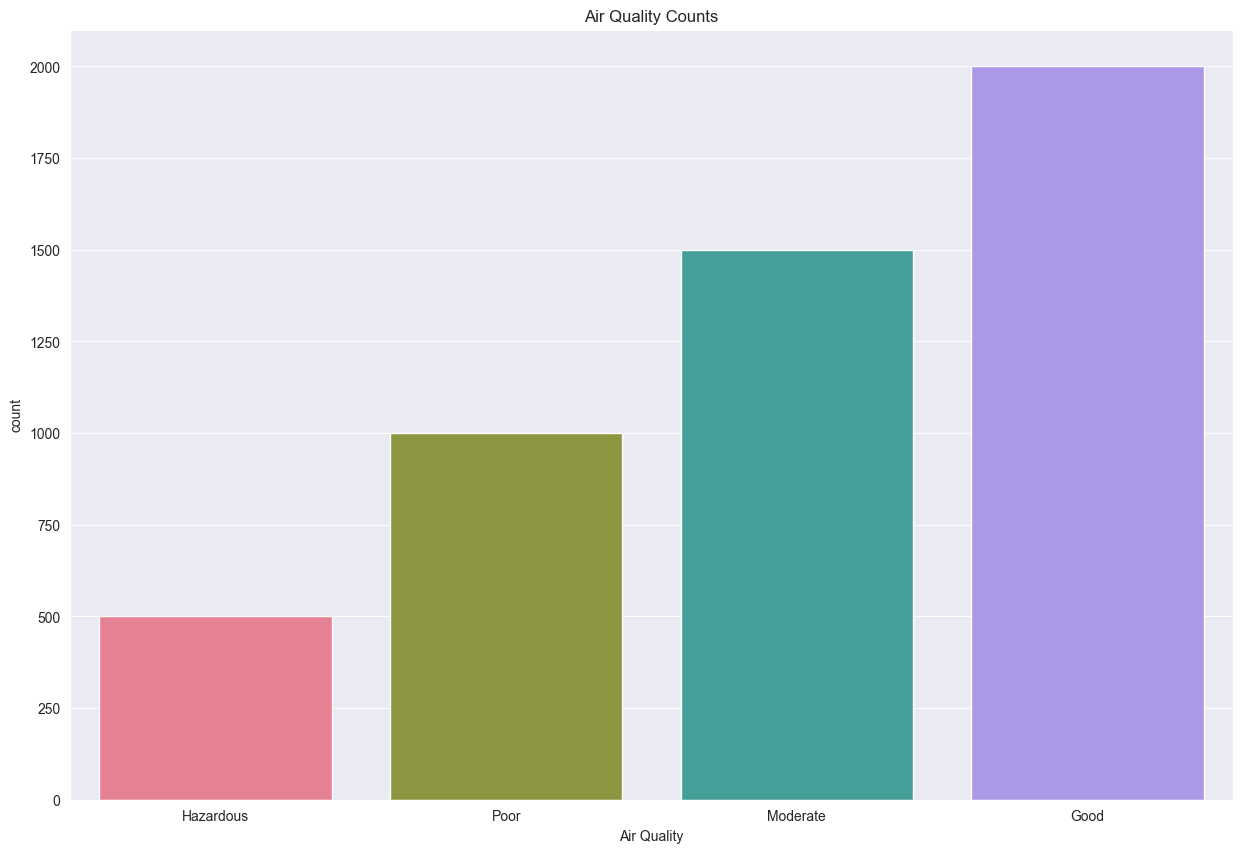

In [21]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Air Quality', hue='Air Quality', data=data_sorted, palette='husl')
plt.title("Air Quality Counts")
plt.show()

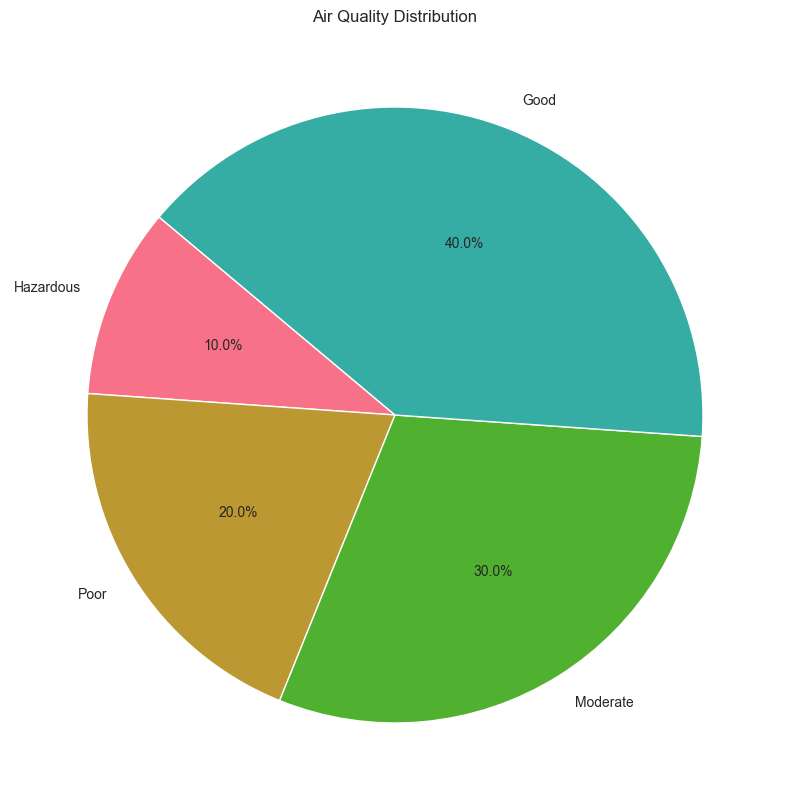

In [22]:
air_quality_counts = data_sorted['Air Quality'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(15, 10))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl'))
plt.title("Air Quality Distribution")
plt.show()

The class distribution shows some imbalance, which could affect the performance of ML models. Combining the "Moderate" and "Good" classes into a single "Good" category and the "Poor" and "Hazardous" classes into a "Bad" category might simplify the analysis, but it could also result in the loss of detailed insights into intermediate air quality levels. For now, I will proceed with the original classes to explore whether the data can support effective modeling as is and to identify the most influential features. To start, I will display a pairplot to examine these features.

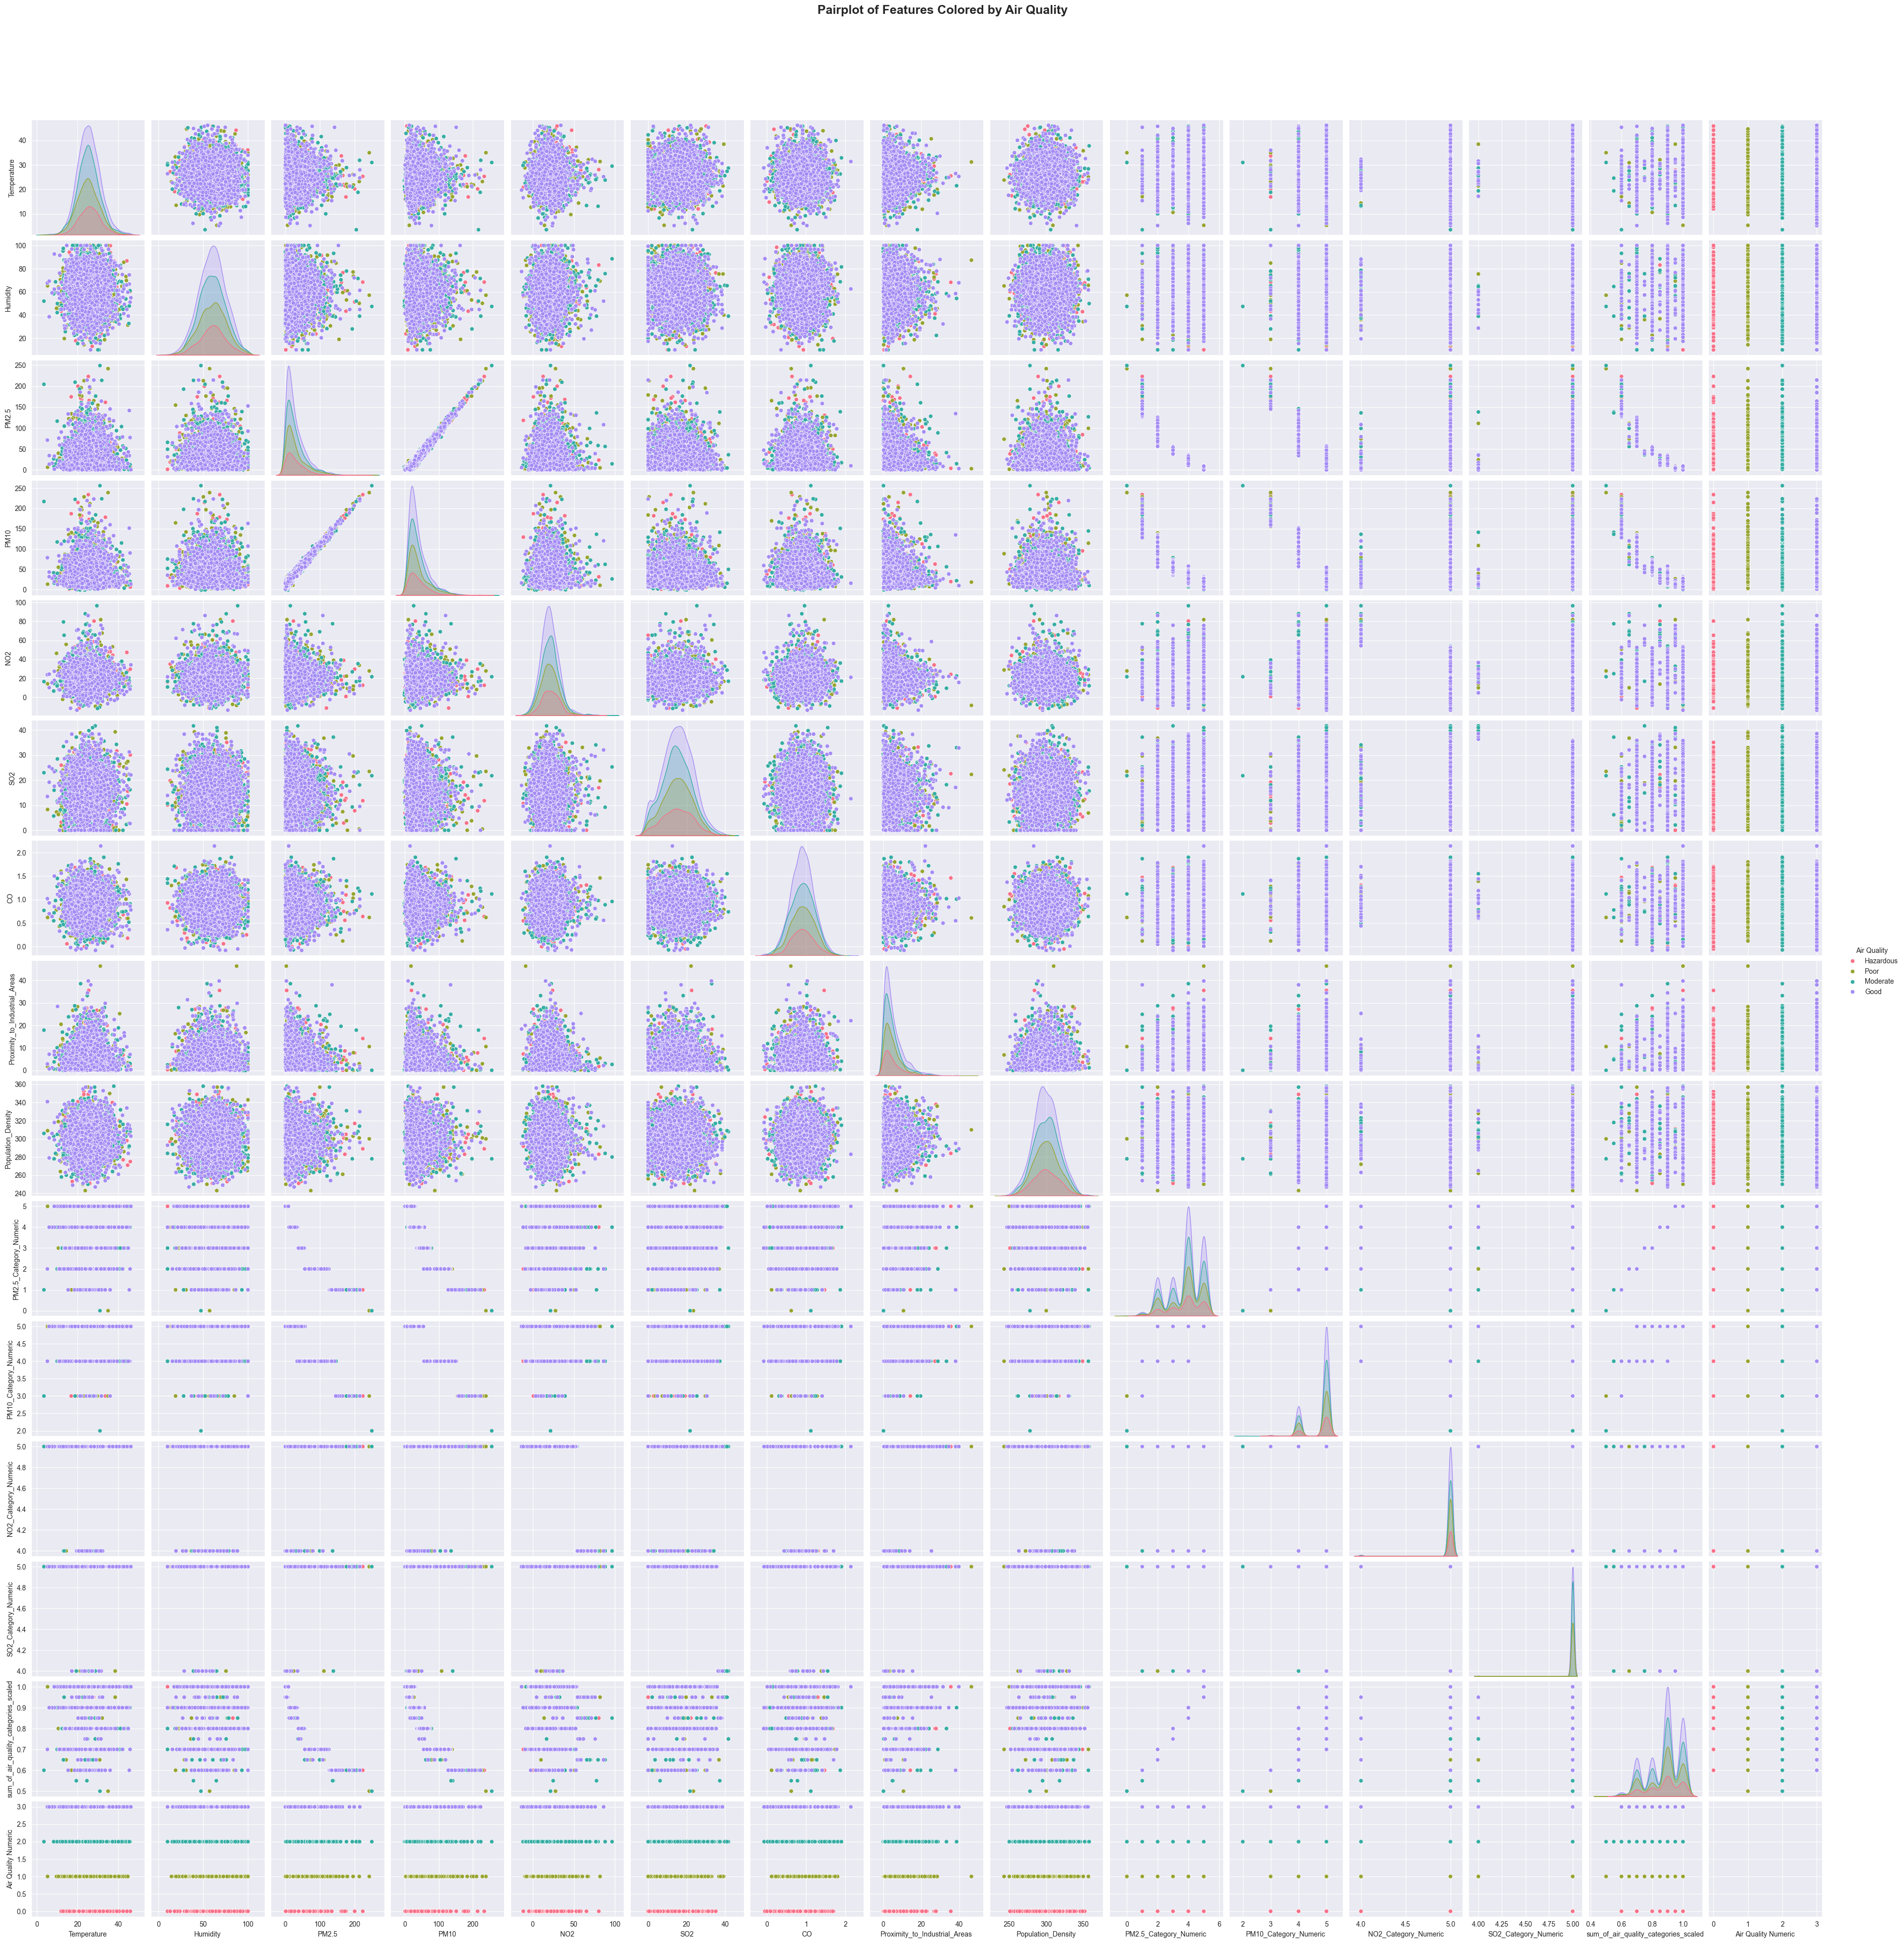

In [23]:
sns.pairplot(data_sorted, hue='Air Quality', diag_kind='kde', palette="husl")
plt.suptitle('Pairplot of Features Colored by Air Quality', fontsize=18, y=1.05, fontweight='bold')
plt.show()

In the pairplot, there are noticeable patterns in PM2.5 and PM10 that suggest their potential significance in determining air quality categories. However, these patterns alone might not be sufficient for robust conclusions. Before calculating the correlation scores, I will further explore the data by examining the Air Quality through the summed values of the air quality categories to identify additional insights and relationships.

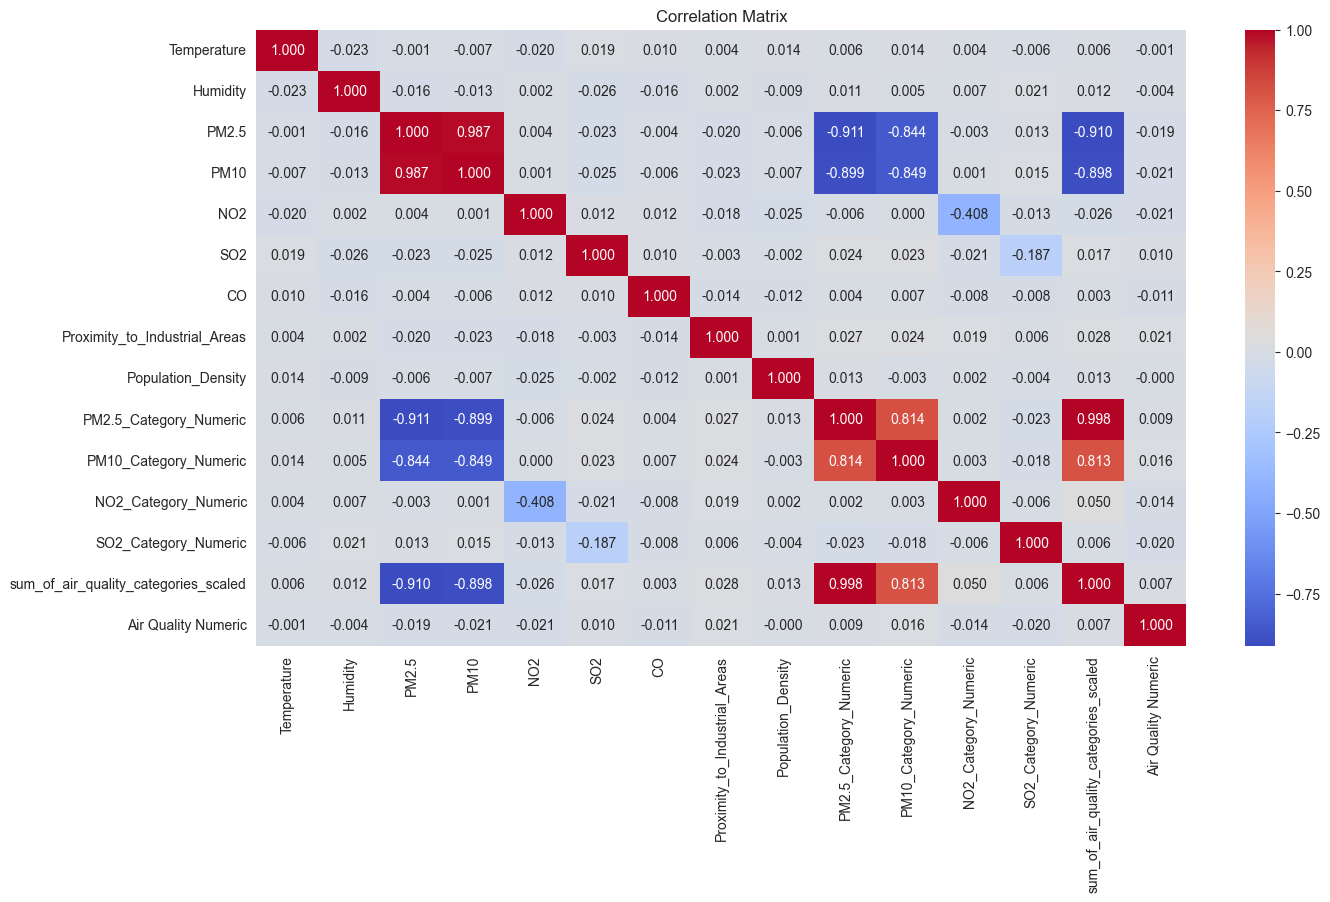

In [24]:
correlation_matrix = data_sorted.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

#### Correlation Analysis
The correlation matrix provides a detailed overview of the relationships between different features in the dataset. Below are the key observations from the matrix:

##### Strong Correlations:

- PM2.5 and PM10: These two variables show a very strong positive correlation (0.987), indicating that they are closely related and might be influenced by similar environmental factors.
Sum of Air Quality Categories (Scaled) and PM2.5/PM10 Categories: The sum_of_air_quality_categories_scaled variable has a strong negative correlation with PM2.5_Category_Numeric (-0.910) and PM10_Category_Numeric (-0.898). This suggests that as air quality degrades (higher PM values), the scaled sum decreases.
##### Air Quality Numeric Correlations:

- The Air Quality Numeric variable shows weaker correlations with most features. This might indicate that it encapsulates broader trends rather than specific pollutant levels.
#####  Proximity to Industrial Areas and Population Density:

- These features show very low correlations with pollutant levels (PM2.5, PM10) and air quality categories, indicating they may not be significant contributors in this dataset.
#####  NO2, SO2, and CO:

While these pollutants are generally weakly correlated with each other, SO2_Category_Numeric has a noticeable relationship with sum_of_air_quality_categories_scaled (0.813), suggesting its importance in overall air quality determination.
##### Temperature and Humidity:

Both features show very weak correlations with pollutant levels and air quality categories, suggesting limited direct influence on the air quality variables in this dataset.
#### Insights:
- PM2.5 and PM10 are key contributors to poor air quality, as indicated by their strong correlations with air quality categories.
- The sum_of_air_quality_categories_scaled variable effectively captures the impact of individual pollutants and can be a useful feature for further modeling.
Features like proximity to industrial areas and population density may need further exploration to assess their potential indirect effects.
#### Next Steps:
- Investigate the importance of sum_of_air_quality_categories_scaled and its role in predicting overall air quality.
- Focus on PM2.5 and PM10 for feature engineering, as they strongly influence air quality categories.
- Consider removing or re-evaluating features like Proximity_to_Industrial_Areas and Population_Density if their low correlations persist in predictive modeling.



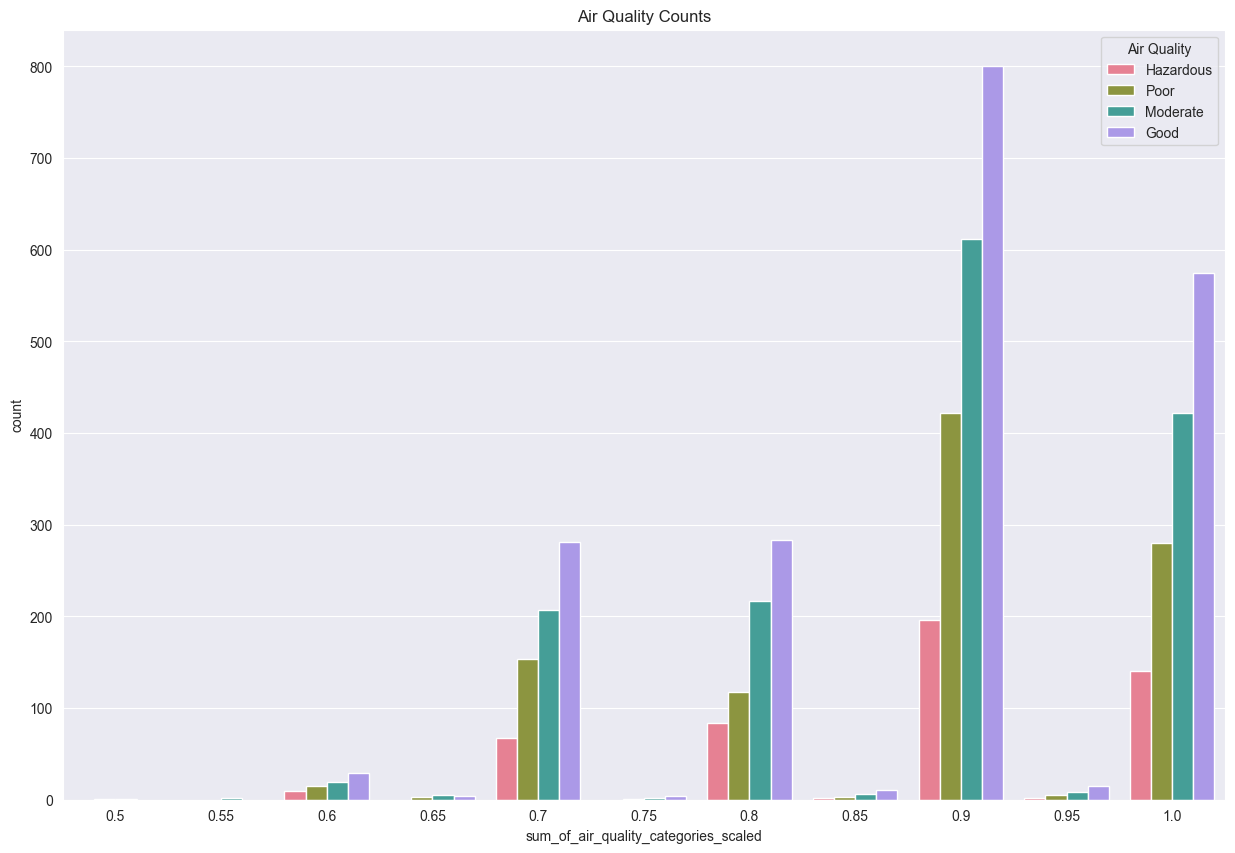

In [28]:
plt.figure(figsize=(15, 10))
sns.countplot(x='sum_of_air_quality_categories_scaled', hue='Air Quality', data=data_sorted, palette='husl')
plt.title("Air Quality Counts")
plt.show()

In this count plot chart we can see:

1. **Dominance of "Good" Air Quality**:
   - The "Good" air quality category has the highest count in all ranges of the scaled values, especially concentrated in the upper ranges (0.9 and above). This indicates that most of the data represents favorable air quality conditions.

2. **Distribution of Other Categories**:
   - "Moderate" air quality also shows significant counts, primarily in the ranges of 0.7 to 0.9.
   - "Poor" and "Hazardous" categories have much smaller counts and are primarily distributed in the lower and mid-ranges (0.6 to 0.8). This highlights a notable class imbalance, where unfavorable air quality conditions are underrepresented in the dataset.

3. **Class Imbalance and Its Implications**:
   - The skewed distribution towards "Good" and "Moderate" air quality can introduce challenges in training machine learning models, as the underrepresented "Poor" and "Hazardous" categories may not have sufficient data for robust predictions.

4. **Scaled Sum as a Feature**:
   - The `sum_of_air_quality_categories_scaled` variable appears to effectively capture the transition between air quality categories. Higher scaled sums are associated with "Good" air quality, while lower sums are more likely to indicate "Poor" or "Hazardous" air quality.

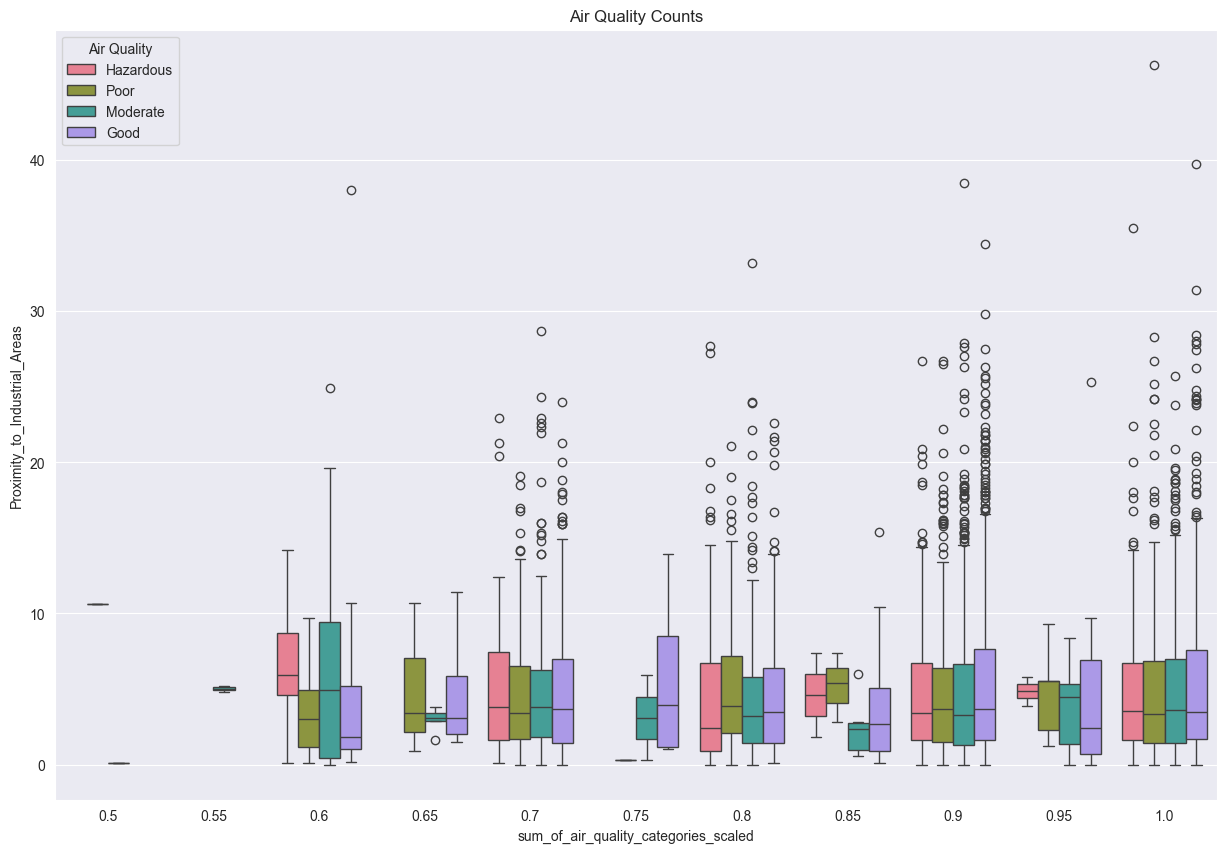

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='sum_of_air_quality_categories_scaled', y="Proximity_to_Industrial_Areas", hue='Air Quality', data=data_sorted, palette='husl')
plt.title("Air Quality Counts")
plt.show()

In this boxplot we can see:

1. **Variation Across Air Quality Categories**:
   - For all air quality categories ("Good," "Moderate," "Poor," and "Hazardous"), the proximity values are widely distributed, indicating variability in how industrial proximity affects air quality.

2. **Higher Proximity Outliers**:
   - Outliers with higher proximity values (greater than 20) are observed across all air quality levels. These could represent areas with extreme industrial activity or inaccuracies in data.

3. **Distribution Patterns**:
   - For "Good" and "Moderate" air quality:
     - Proximity values are centered around lower values, with wider interquartile ranges as scaled air quality values increase.
   - For "Poor" and "Hazardous" air quality:
     - Distributions tend to have smaller interquartile ranges, but there are notable outliers.

4. **Effect of Air Quality Scale**:
   - As the `sum_of_air_quality_categories_scaled` increases (indicating better air quality), the proximity values for "Good" air quality appear to stabilize. However, other categories maintain a similar spread across the scale.

5. **Class Overlap**:
   - Significant overlap in proximity ranges across all air quality categories suggests that proximity alone may not be a definitive factor for air quality prediction.

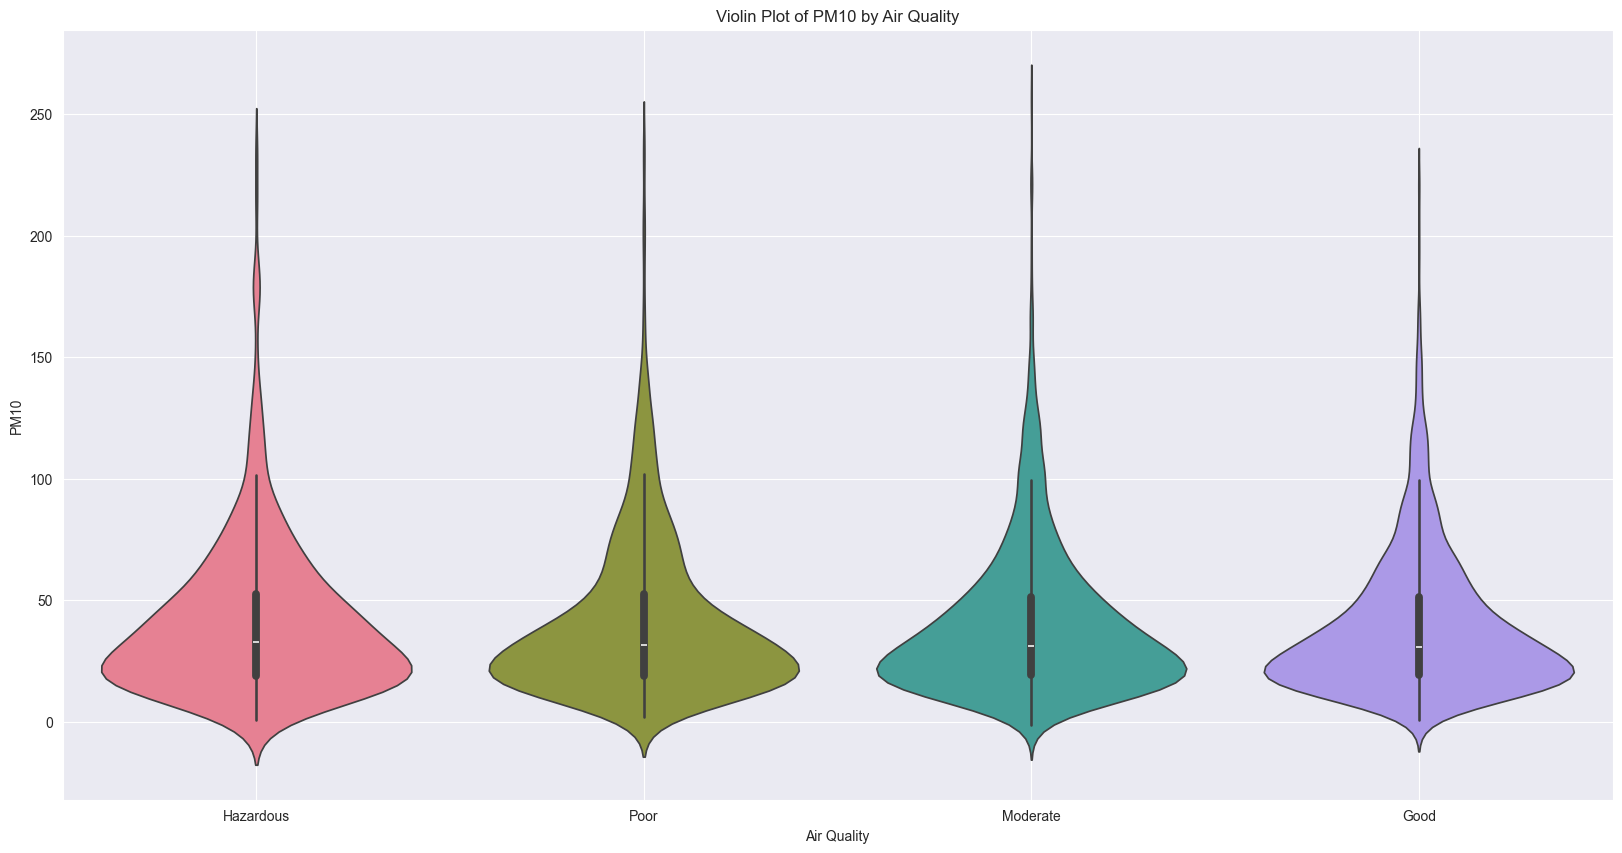

In [27]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Air Quality', hue="Air Quality", y='PM10', data=data_sorted, palette="husl") 
plt.title("Violin Plot of PM10 by Air Quality")
plt.grid(True)
plt.show()

The violin plot provides a detailed representation of the distribution of PM10 levels across different air quality categories ("Good," "Moderate," "Poor," and "Hazardous"). Below are the key observations:

1. **PM10 Levels Across Categories**:
   - **Hazardous**: The distribution shows a wide range of PM10 values, with the majority concentrated in higher values (above 100). This indicates that elevated PM10 levels strongly contribute to hazardous air quality.
   - **Poor**: PM10 levels are moderately distributed, with the central tendency lower than the "Hazardous" category but still spread towards higher values.
   - **Moderate**: The PM10 levels in this category are relatively lower, with a tighter distribution around the central values.
   - **Good**: This category has the lowest PM10 levels, with most values concentrated near the bottom of the range.

2. **Shape of Distributions**:
   - The violin plot reveals a gradual reduction in PM10 levels as the air quality improves from "Hazardous" to "Good."
   - The tails of the distributions for "Hazardous" and "Poor" categories extend into higher PM10 values, suggesting occasional spikes in particulate matter levels.

3. **Implications for Air Quality**:
   - The strong correlation between PM10 levels and air quality categories highlights PM10 as a key factor in determining air quality status.
   - The overlap between "Poor" and "Moderate" categories suggests some level of continuity between these classifications, which may require precise thresholds for effective differentiation.

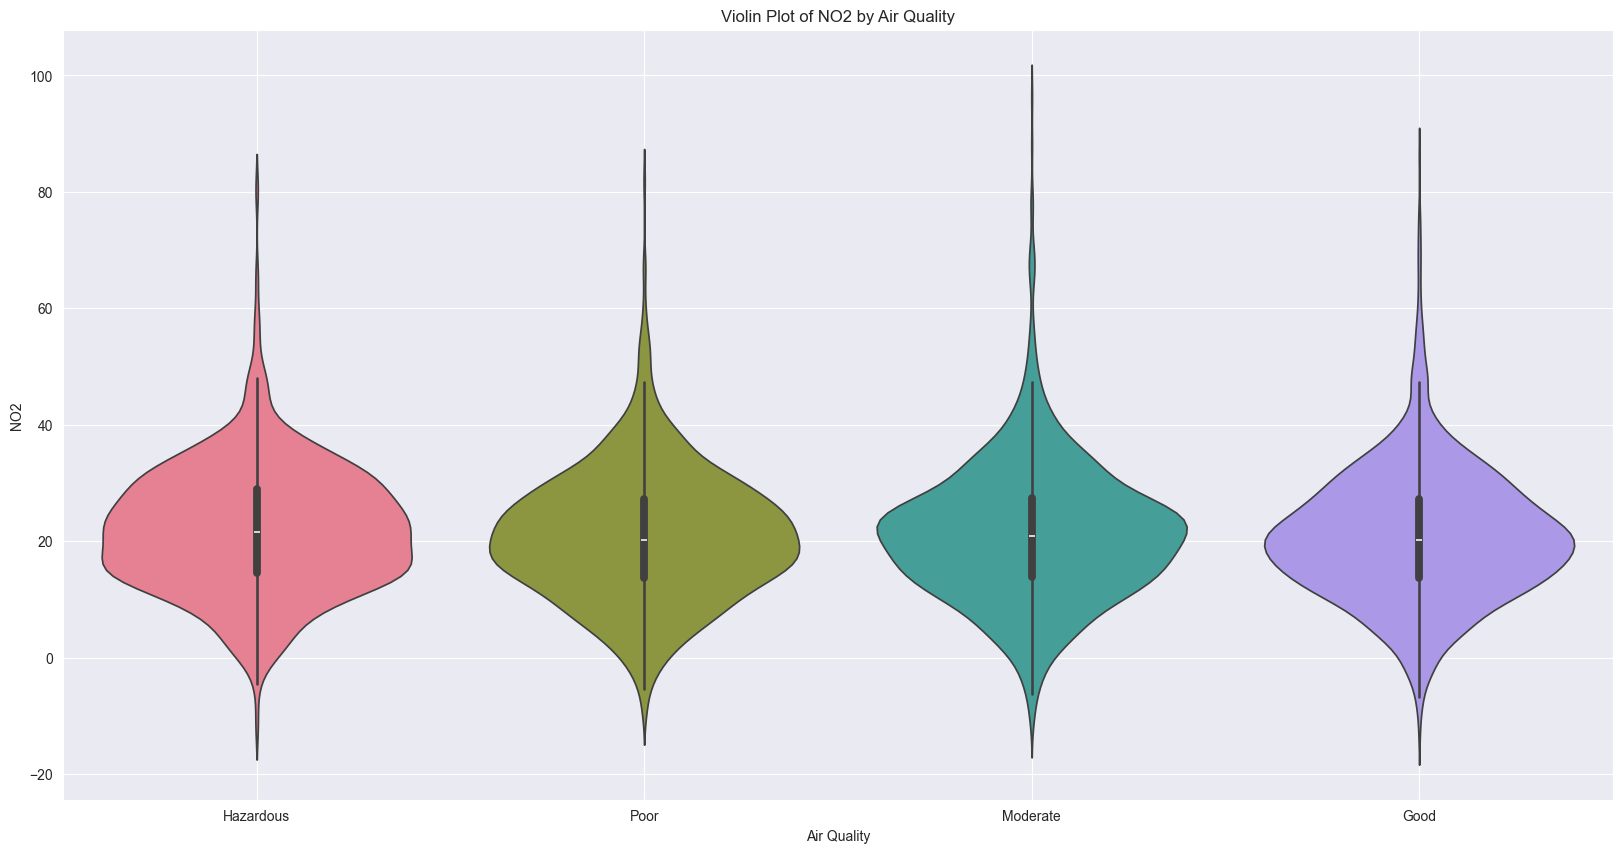

In [27]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Air Quality', hue="Air Quality", y='NO2', data=data_sorted, palette="husl") 
plt.title("Violin Plot of NO2 by Air Quality")
plt.grid(True)
plt.show()

The violin plot illustrates the distribution of NO2 levels across different air quality categories ("Good," "Moderate," "Poor," and "Hazardous"). Below are the key observations:

1. **NO2 Distribution Across Categories**:
   - **Hazardous**: This category shows the widest range of NO2 levels, extending up to 100. The central tendency (median) is higher compared to other categories, indicating that elevated NO2 levels significantly contribute to hazardous air quality.
   - **Poor**: NO2 levels are moderately distributed, with a slightly lower central tendency compared to the "Hazardous" category, but the overall range remains broad.
   - **Moderate**: The NO2 distribution narrows considerably, with most values centered around lower levels.
   - **Good**: This category has the tightest distribution and the lowest NO2 levels, highlighting the strong association between low NO2 concentrations and good air quality.

2. **Overlap Between Categories**:
   - There is some overlap in NO2 levels between "Moderate" and "Poor" categories, which may complicate the differentiation between these classes in predictive models.
   - The "Good" category has minimal overlap with the others, reinforcing its distinction in terms of NO2 levels.

3. **Extreme Values**:
   - Outliers are observed in all categories, particularly in "Hazardous" and "Poor," where NO2 levels occasionally exceed 80-100. These outliers may indicate industrial or vehicular pollution spikes.

4. **Insights on NO2's Role**:
   - NO2 levels appear to have a significant impact on air quality classification, with a clear gradient as air quality improves (lower NO2 levels correspond to better air quality categories).

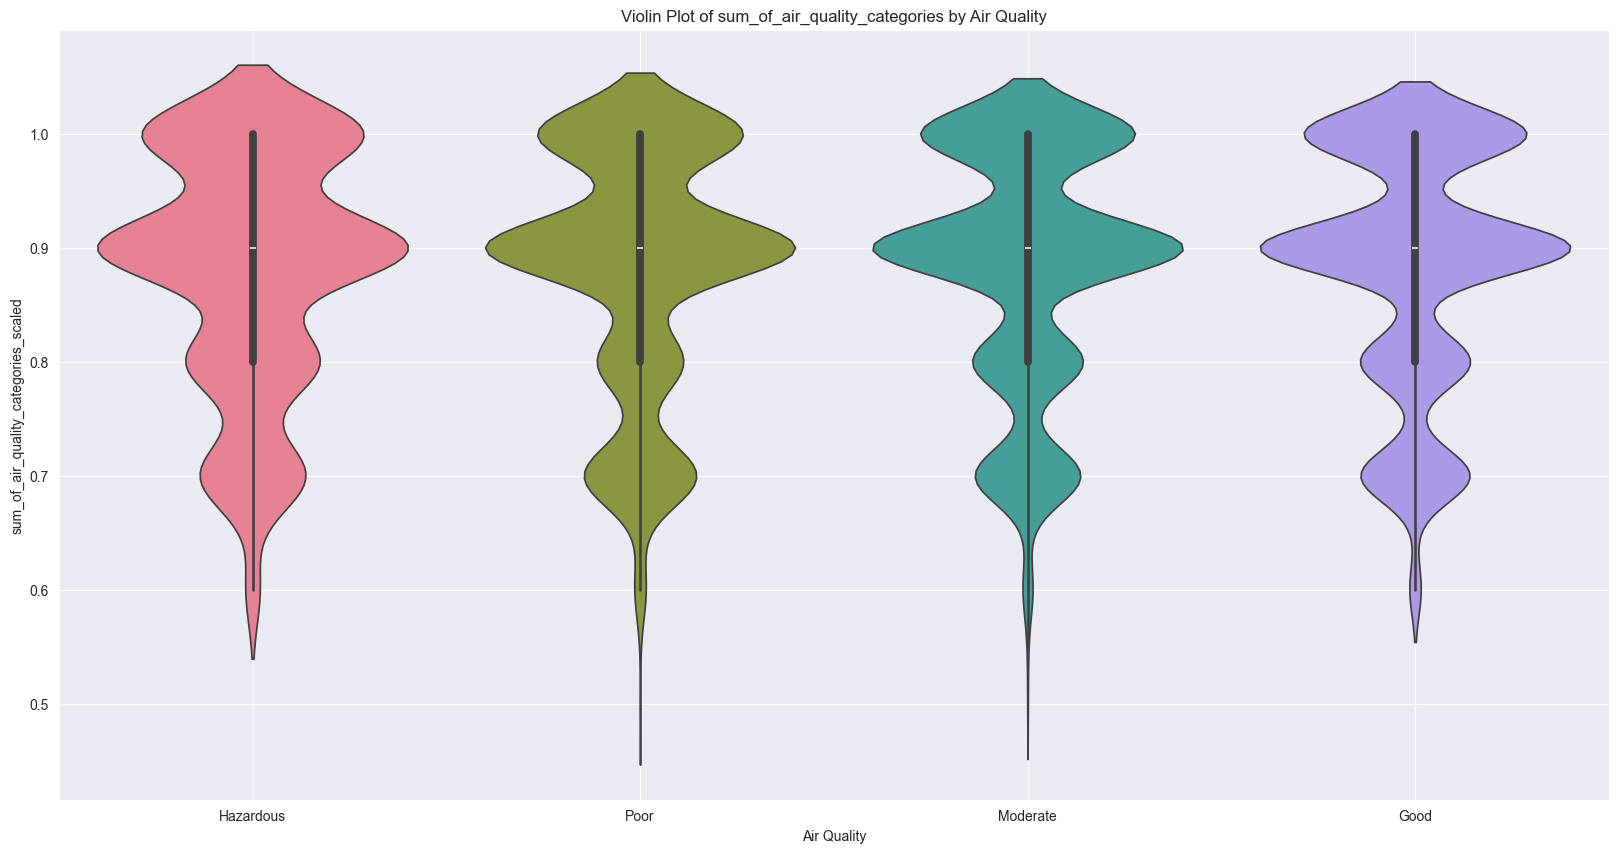

In [28]:
plt.figure(figsize=(20, 10))
sns.violinplot(x="Air Quality", y='sum_of_air_quality_categories_scaled', hue="Air Quality", data=data_sorted, palette="husl") 
plt.title("Violin Plot of sum_of_air_quality_categories by Air Quality")
plt.grid(True)
plt.show()

Below are the observations:

1. **Distinct Separation Across Categories**:
   - The distributions for each air quality category are relatively distinct, indicating that the `sum_of_air_quality_categories_scaled` is an effective feature for differentiating air quality levels.
   - Higher scaled values correspond to better air quality ("Good"), while lower scaled values are associated with poorer air quality ("Hazardous").

2. **Shape and Variance**:
   - **Hazardous**: The distribution is more compressed, with values ranging primarily from 0.5 to 0.8. The peak density occurs in the lower range, indicating consistently poor air quality in this category.
   - **Poor**: A wider distribution compared to "Hazardous," with values centered around 0.8.
   - **Moderate**: The distribution is slightly narrower, with most values clustered between 0.85 and 0.9.
   - **Good**: The narrowest and most compressed distribution, centered around 0.95 to 1.0, highlighting consistently good air quality in this category.

3. **Overlap Between Categories**:
   - There is minimal overlap between adjacent categories, such as "Poor" and "Moderate," which reinforces the usefulness of this feature for classification tasks.
   - The "Hazardous" and "Poor" categories have the greatest overlap, which may indicate transitional cases or data variability.

4. **Insights on the Scaled Sum**:
   - The feature effectively captures the gradient of air quality, making it a strong candidate for use in predictive models or for threshold-based classifications.

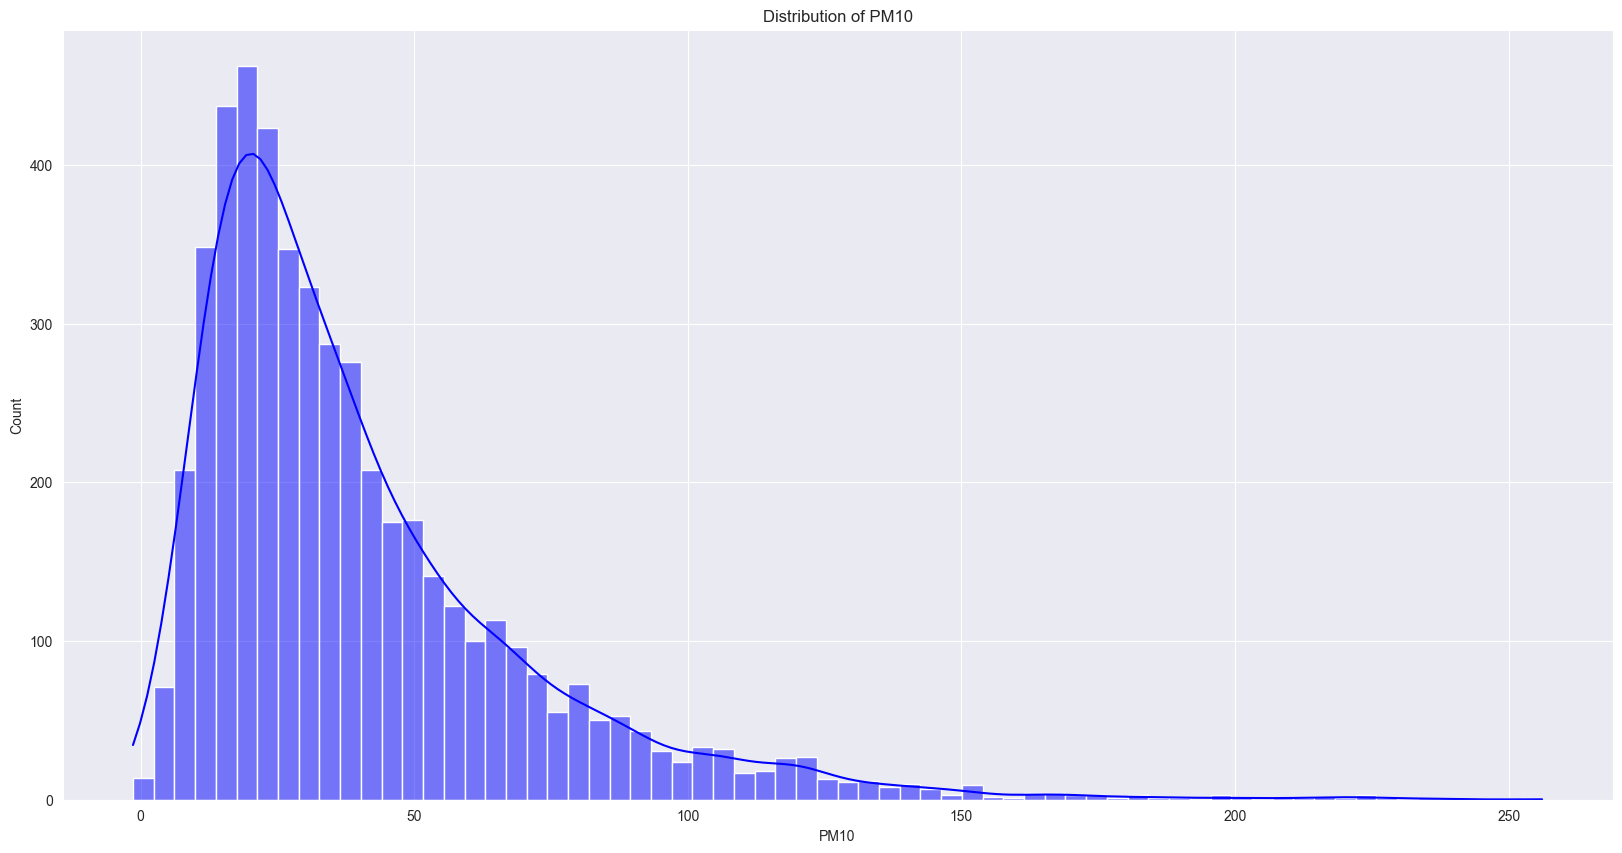

In [29]:
plt.figure(figsize=(20, 10))
sns.histplot(data_sorted['PM10'], kde=True, color='blue')
plt.title("Distribution of PM10")
plt.show()

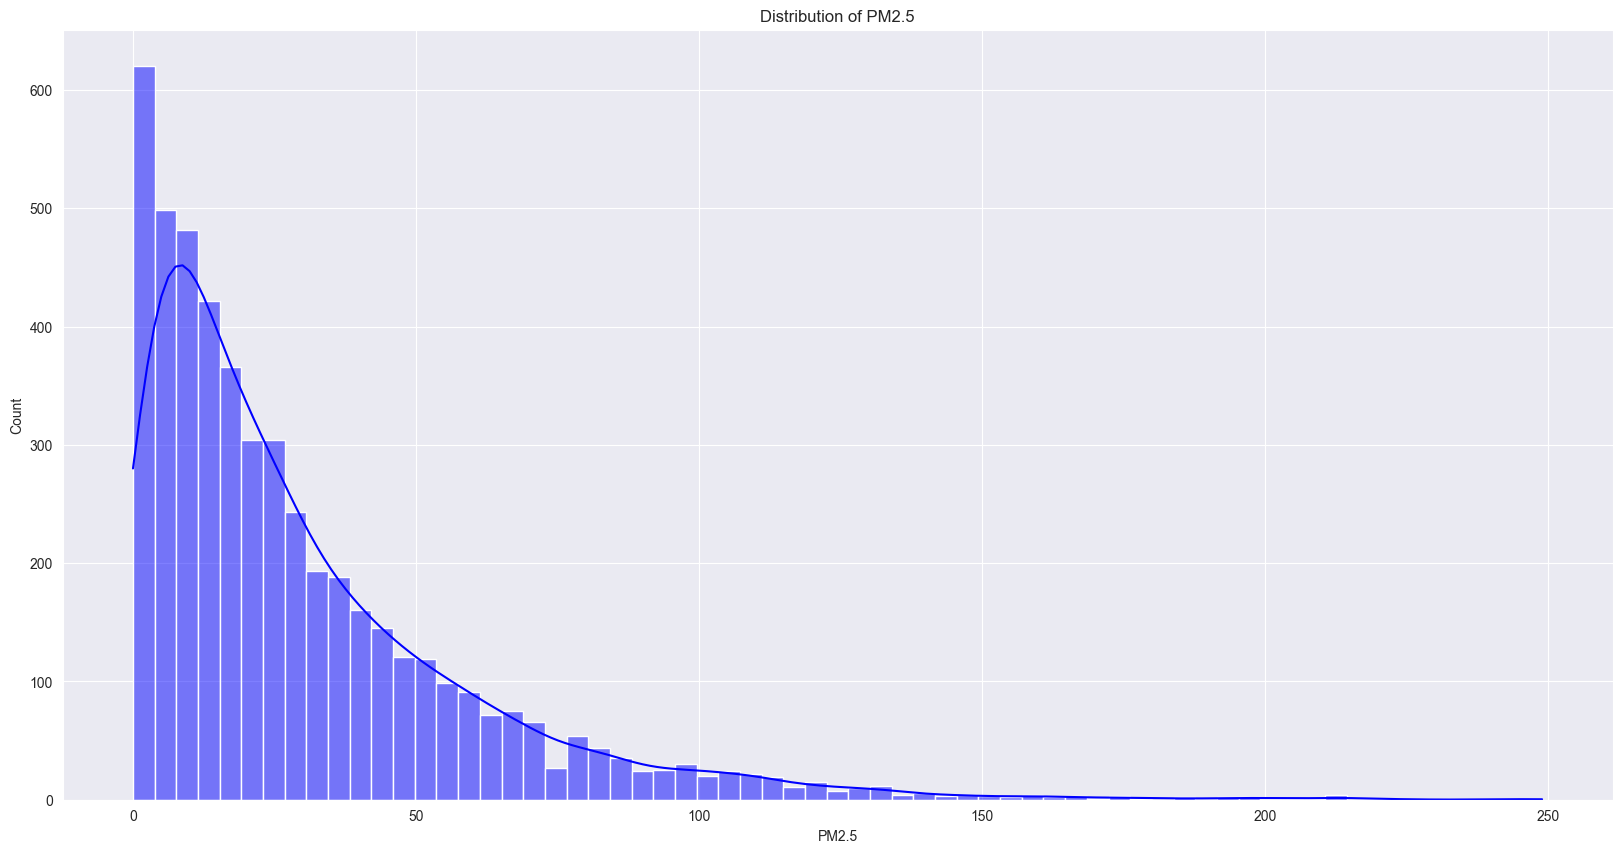

In [30]:
plt.figure(figsize=(20, 10))
sns.histplot(data_sorted['PM2.5'], kde=True, color='blue')
plt.title("Distribution of PM2.5")
plt.show()

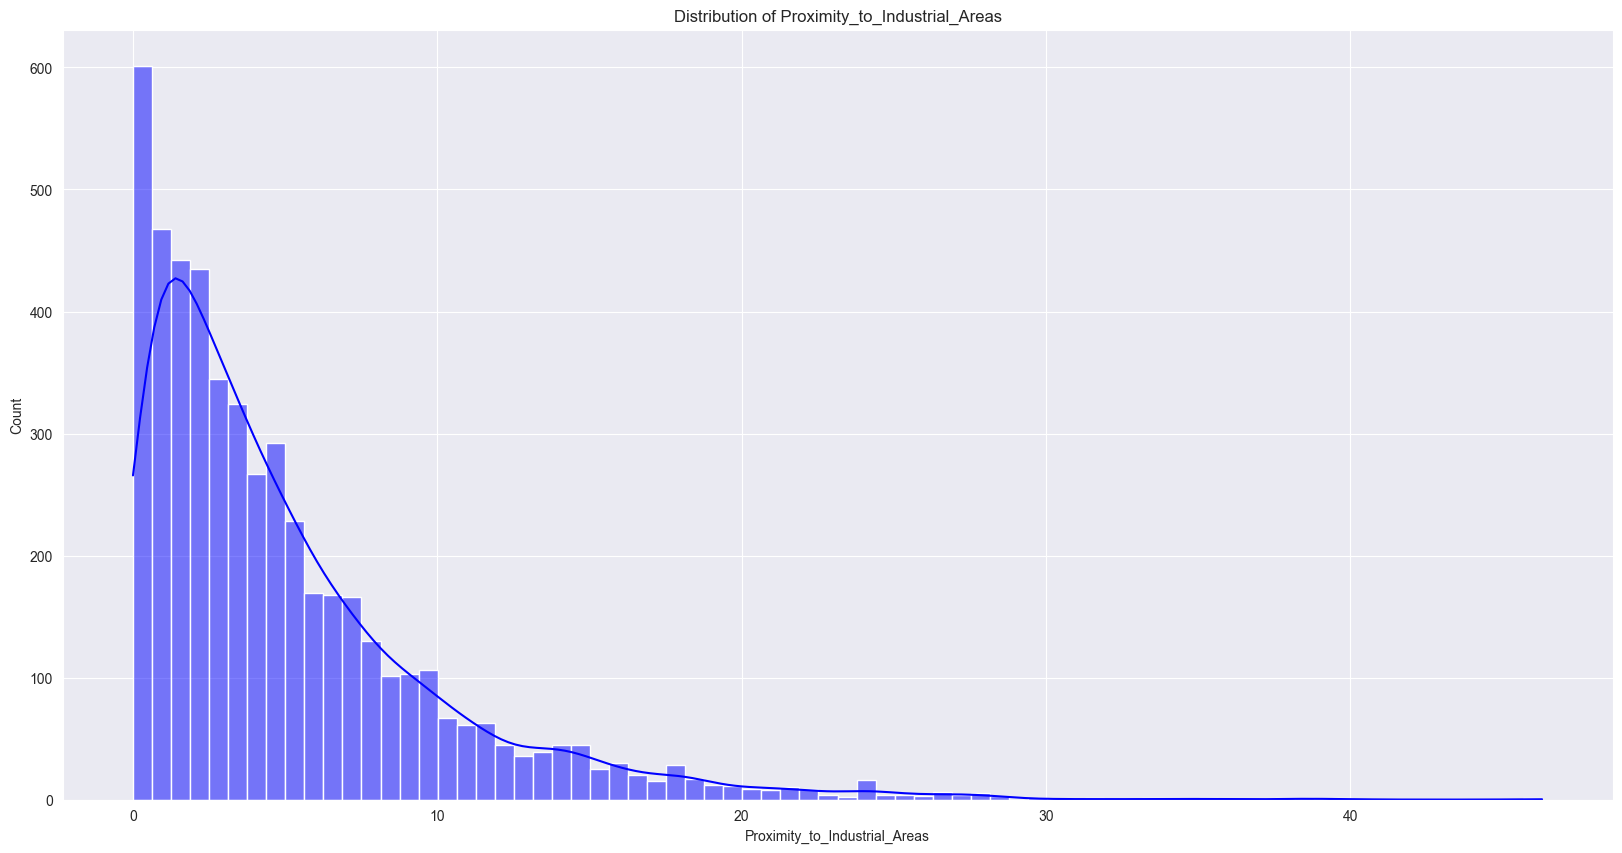

In [31]:
plt.figure(figsize=(20, 10))
sns.histplot(data_sorted['Proximity_to_Industrial_Areas'], kde=True, color='blue')
plt.title("Distribution of Proximity_to_Industrial_Areas")
plt.show()

I initially plotted the distributions of PM10, PM2.5, and Proximity to Industrial Areas to assess whether a log transformation could help achieve a normal distribution, as this can be beneficial for certain machine learning models. However, after further analysis, I realized that attempting to normalize these variables does not make sense for the task at hand, as their inherent distributions are heavily skewed and reflect real-world patterns. As a result, I decided to retain the original distributions for further analysis.

# 7. Make new features.

With the analysis below I am going to do next:

1. **Create 'is_safety' Column**: Categorize air quality into "safe" (Good, Moderate) and "unsafe" (Poor, Hazardous) for simplified binary classification.

2. **Convert to Categorical**: Transform the `is_safety` column into an ordered categorical type to establish logical ordering ("unsafe" < "safe").

3. **Encode as Numeric**: Add a `is_safety_numeric` column, numerically encoding "unsafe" as `0` and "safe" as `1` for compatibility with machine learning models.

These steps will streamline the dataset for binary analysis and modeling while preserving essential air quality distinctions.


In [32]:
data_sorted['is_safety'] = data_sorted['Air Quality'].apply(lambda x: "safe" if x in ['Good','Moderate'] else "unsafe")
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  ...  \
0                              11.2                 314   Hazardous  ...   
1                               4.8                 276   Hazardous  ...   
2                               4.0                 300   Hazardous  ...   
3                               1.9                 292   Hazardous  ...   
4                              14.5                 268   Hazardous  ...   
...                             ...                 ...         ...  ...   
4995                            5.5                 309        Good  ...   
4996                            0.5                 299        Good  ...   
4997                            7.8                 307        Good  ...   
4998                            1.9                 304        Good  ...   
4999                            5.1                 288        Good  ...   

     PM2.5_Category_Numeric  PM10_Category PM10_Category_Numeric  \
0                         4           Good                     5   
1                         4           Good                     5   
2                         3       Moderate                     4   
3                         4           Good                     5   
4                         3           Good                     5   
...                     ...            ...                   ...   
4995                      5           Good                     5   
4996                      5           Good                     5   
4997                      4           Good                     5   
4998                      4           Good                     5   
4999                      2       Moderate                     4   

      NO2_Category NO2_Category_Numeric  SO2_Category SO2_Category_Numeric  \
0             Good                    5          Good                    5   
1             Good                    5          Good                    5   
2             Good                    5          Good                    5   
3             Good                    5          Good                    5   
4             Good                    5          Good                    5   
...            ...                  ...           ...                  ...   
4995          Good                    5          Good                    5   
4996          Good                    5          Good                    5   
4997          Good                    5          Good                    5   
4998          Good                    5          Good                    5   
4999          Good                    5          Good                    5   

      sum_of_air_quality_categories_scaled  Air Quality Numeric  is_safety  
0                                      0.9                    0     unsafe  
1                                      0.9                    0     unsafe  
2                                      0.8                    0     unsafe  
3                                      0.9                    0     unsafe  
4                                      0.8                    0     unsafe  
...                                    ...                  ...        ...  
4995                                   1.0             

In [33]:
data_sorted.is_safety = pd.Categorical(data_sorted['is_safety'], categories=["unsafe", "safe"], ordered=True)
data_sorted["is_safety_numeric"] = data_sorted.is_safety.cat.codes
data_sorted

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density Air Quality  ...  \
0                              11.2                 314   Hazardous  ...   
1                               4.8                 276   Hazardous  ...   
2                               4.0                 300   Hazardous  ...   
3                               1.9                 292   Hazardous  ...   
4                              14.5                 268   Hazardous  ...   
...                             ...                 ...         ...  ...   
4995                            5.5                 309        Good  ...   
4996                            0.5                 299        Good  ...   
4997                            7.8                 307        Good  ...   
4998                            1.9                 304        Good  ...   
4999                            5.1                 288        Good  ...   

     PM10_Category  PM10_Category_Numeric NO2_Category  NO2_Category_Numeric  \
0             Good                      5         Good                     5   
1             Good                      5         Good                     5   
2         Moderate                      4         Good                     5   
3             Good                      5         Good                     5   
4             Good                      5         Good                     5   
...            ...                    ...          ...                   ...   
4995          Good                      5         Good                     5   
4996          Good                      5         Good                     5   
4997          Good                      5         Good                     5   
4998          Good                      5         Good                     5   
4999      Moderate                      4         Good                     5   

     SO2_Category  SO2_Category_Numeric sum_of_air_quality_categories_scaled  \
0            Good                     5                                  0.9   
1            Good                     5                                  0.9   
2            Good                     5                                  0.8   
3            Good                     5                                  0.9   
4            Good                     5                                  0.8   
...           ...                   ...                                  ...   
4995         Good                     5                                  1.0   
4996         Good                     5                                  1.0   
4997         Good                     5                                  0.9   
4998         Good                     5                                  0.9   
4999         Good                     5                                  0.7   

      Air Quality Numeric  is_safety  is_safety_numeric  
0                       0     unsafe                  0  
1                       0     unsafe                  0  
2                       0     unsafe                  0  
3                       0     unsafe                  0  
4                       0     unsafe                  0  
...                   ...        ...                ...  
4995                

In [34]:
data_sorted.is_safety.value_counts()

is_safety
safe      3500
unsafe    1500
Name: count, dtype: int64

# 8. Data Analysis

In the second data analysis, I will examine the balance between the binary classes "safe" and "unsafe."

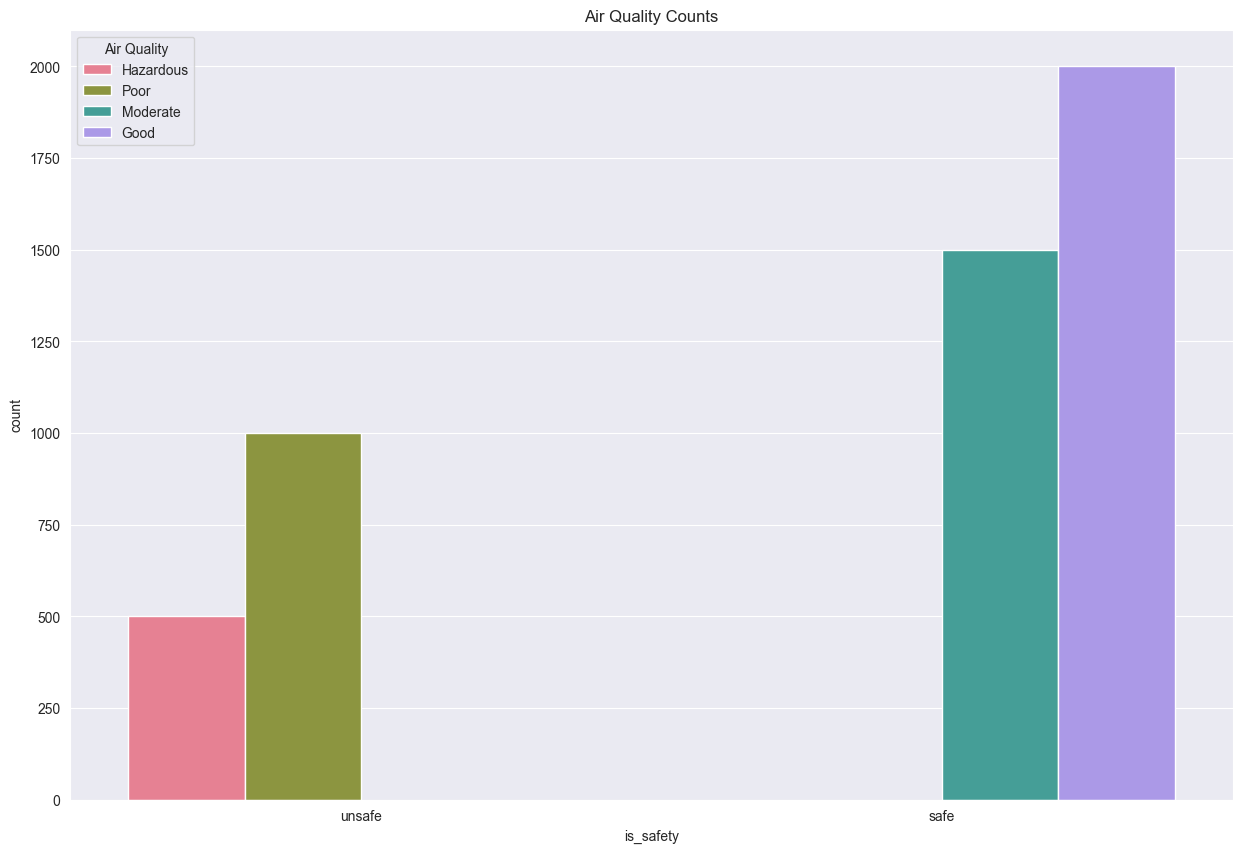

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(x='is_safety', hue='Air Quality', data=data_sorted, palette='husl')
plt.title("Air Quality Counts")
plt.show()

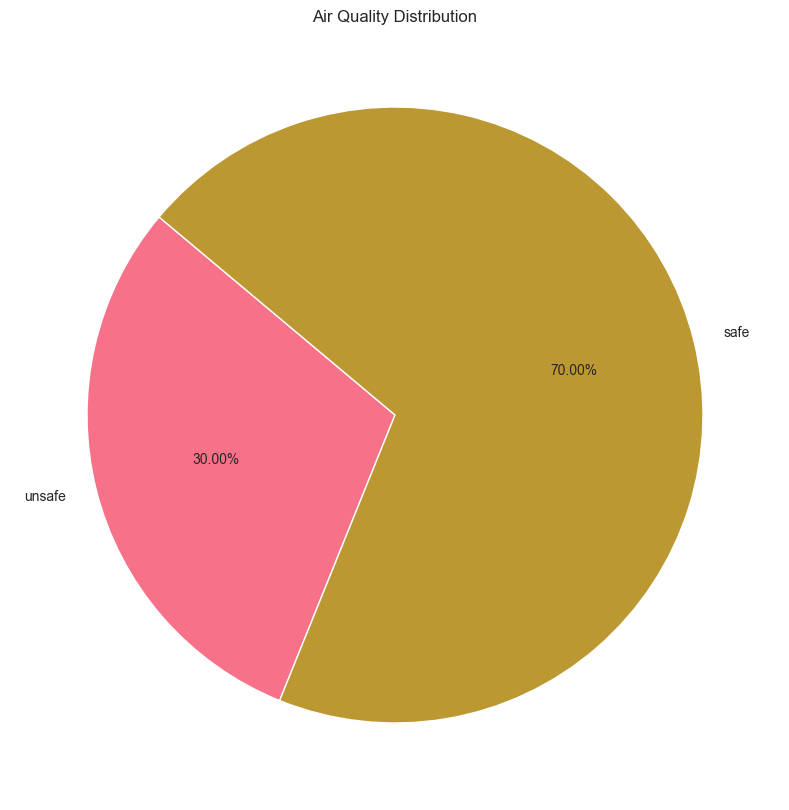

In [36]:
air_quality_counts = data_sorted['is_safety'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(15, 10))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('husl'))
plt.title("Air Quality Distribution")
plt.show()

The distribution of the "safe" and "unsafe" classes shows a significant imbalance, with "safe" making up 70% and "unsafe" 30% of the data. However, since this is now a binary classification problem, the imbalance is less complex than dealing with multiple categories. This simplification can make it easier for the model to learn and improve its performance, although techniques to address the imbalance might still be necessary for optimal results.

First of all we will make prediction if our data "safe" or "unsafe". And after that we will predict "safe" and "unsafe" subclasses (Hazardous, Poor, Moderate, Good). Additionally check them:

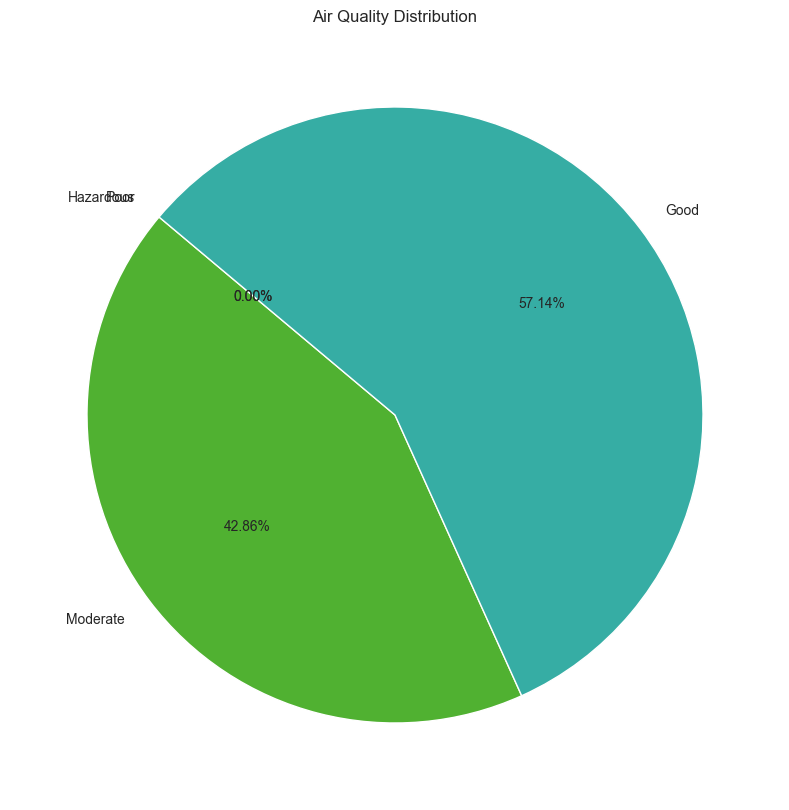

In [37]:
data_sorted_safety = data_sorted[data_sorted['is_safety'] == 'safe']
air_quality_counts = data_sorted_safety['Air Quality'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(15, 10))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('husl'))
plt.title("Air Quality Distribution")
plt.show()

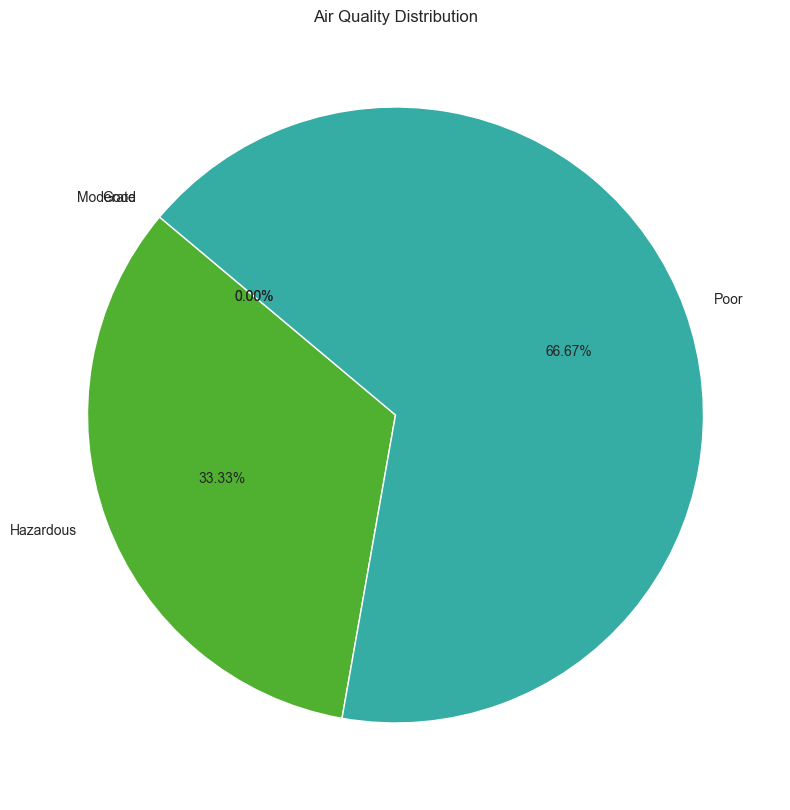

In [38]:
data_sorted_safety = data_sorted[data_sorted['is_safety'] == 'unsafe']
air_quality_counts = data_sorted_safety['Air Quality'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(15, 10))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('husl'))
plt.title("Air Quality Distribution")
plt.show()

When examining the subclasses of "safe" and "unsafe" (Hazardous, Poor, Moderate, Good), we can observe the balance within these subclasses. Based on this observation, the most logical approach is to first predict whether the data belongs to the "safe" or "unsafe" category. Once this binary classification is complete, we can then proceed to predict the specific subclasses within "safe" and "unsafe."


# 9. Train with multi classification

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier

## 9.1 Prepare data

In [40]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Temperature                           5000 non-null   float64 
 1   Humidity                              5000 non-null   float64 
 2   PM2.5                                 5000 non-null   float64 
 3   PM10                                  5000 non-null   float64 
 4   NO2                                   5000 non-null   float64 
 5   SO2                                   5000 non-null   float64 
 6   CO                                    5000 non-null   float64 
 7   Proximity_to_Industrial_Areas         5000 non-null   float64 
 8   Population_Density                    5000 non-null   int64   
 9   Air Quality                           5000 non-null   category
 10  PM2.5_Category                        5000 non-null   category
 11  PM2.

In [41]:
data_without_categories = data_sorted.drop(['Air Quality', 'PM2.5_Category', 'PM10_Category', 'NO2_Category', 'SO2_Category', 'is_safety', 'is_safety_numeric'], axis=1)
data_without_categories

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0            27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1            29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2            29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3            24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4            26.4      58.3   45.1  50.2  21.6   0.0  0.64   
...           ...       ...    ...   ...   ...   ...   ...   
4995         35.6      31.7    9.7  27.0  17.1  15.0  1.01   
4996         37.3      38.6    9.0  19.7   4.1   3.4  0.98   
4997         22.3      47.1   14.9  26.5  21.2  19.9  1.23   
4998         32.4      40.8   27.8  41.4  20.5   5.2  0.95   
4999         19.3      59.1   56.2  65.4  26.9  18.8  1.30   

      Proximity_to_Industrial_Areas  Population_Density  \
0                              11.2                 314   
1                               4.8                 276   
2                               4.0                 300   
3                               1.9                 292   
4                              14.5                 268   
...                             ...                 ...   
4995                            5.5                 309   
4996                            0.5                 299   
4997                            7.8                 307   
4998                            1.9                 304   
4999                            5.1                 288   

      PM2.5_Category_Numeric  PM10_Category_Numeric  NO2_Category_Numeric  \
0                          4                      5                     5   
1                          4                      5                     5   
2                          3                      4                     5   
3                          4                      5                     5   
4                          3                      5                     5   
...                      ...                    ...                   ...   
4995                       5                      5                     5   
4996                       5                      5                     5   
4997                       4                      5                     5   
4998                       4                      5                     5   
4999                       2                      4                     5   

      SO2_Category_Numeric  sum_of_air_quality_categories_scaled  \
0                        5                                   0.9   
1                        5                                   0.9   
2                        5                                   0.8   
3                        5                                   0.9   
4                        5                                   0.8   
...                    ...                                   ...   
4995                     5                                   1.0   
4996                     5                                   1.0   
4997                     5                                   0.9   
4998                     5                                   0.9   
4999                     5                                   0.7   

      Air Quality Numeric  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
4995                    3  
4996                    3  
4997                    3  
4998                    3  
4999                    3  

[5000 rows x 15 columns]

In [42]:
data = data_without_categories.drop('Air Quality Numeric', axis=1)
target = data_without_categories['Air Quality Numeric']

In [43]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

## 9.2 Train with xg boost

In [44]:
# Initialize XGBoost Classifier
model = XGBClassifier(n_estimators=128, random_state=42) 

# Train the model
model.fit(data_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## 9.3 Test

In [45]:
# Make predictions
y_pred = model.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(target_test, y_pred)
print(f'XGboost Accuracy: {accuracy_score(target_test, y_pred):.2f}%')
print(classification_report(target_test, y_pred))

XGboost Accuracy: 0.35%
              precision    recall  f1-score   support

           0       0.09      0.02      0.03       111
           1       0.21      0.10      0.13       210
           2       0.32      0.38      0.34       277
           3       0.40      0.55      0.46       402

    accuracy                           0.35      1000
   macro avg       0.25      0.26      0.24      1000
weighted avg       0.30      0.35      0.31      1000



## 9.4 Train with Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

rf_model.fit(data_train, target_train)

y_pred_rf = rf_model.predict(data_test)

## 9.5 Test

In [47]:
rf_accuracy = accuracy_score(target_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(target_test, y_pred_rf))

Random Forest Accuracy: 37.50%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.19      0.03      0.06       210
           2       0.32      0.30      0.31       277
           3       0.41      0.71      0.52       402

    accuracy                           0.38      1000
   macro avg       0.23      0.26      0.22      1000
weighted avg       0.29      0.38      0.31      1000



# 10. Train with binary classification

## 10.1 Prepare Data

In [48]:
data_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Temperature                           5000 non-null   float64 
 1   Humidity                              5000 non-null   float64 
 2   PM2.5                                 5000 non-null   float64 
 3   PM10                                  5000 non-null   float64 
 4   NO2                                   5000 non-null   float64 
 5   SO2                                   5000 non-null   float64 
 6   CO                                    5000 non-null   float64 
 7   Proximity_to_Industrial_Areas         5000 non-null   float64 
 8   Population_Density                    5000 non-null   int64   
 9   Air Quality                           5000 non-null   category
 10  PM2.5_Category                        5000 non-null   category
 11  PM2.

In [54]:
cleaned_data = data_sorted.drop(['Air Quality', 'PM2.5_Category', 'PM10_Category', 'NO2_Category', 'SO2_Category'], axis=1)
cleaned_data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1         29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2         29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3         24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4         26.4      58.3   45.1  50.2  21.6   0.0  0.64   

   Proximity_to_Industrial_Areas  Population_Density  PM2.5_Category_Numeric  \
0                           11.2                 314                       4   
1                            4.8                 276                       4   
2                            4.0                 300                       3   
3                            1.9                 292                       4   
4                           14.5                 268                       3   

   PM10_Category_Numeric  NO2_Category_Numeric  SO2_Category_Numeric  \
0                      5                     5                     5   
1                      5                     5                     5   
2                      4                     5                     5   
3                      5                     5                     5   
4                      5                     5                     5   

   sum_of_air_quality_categories_scaled  Air Quality Numeric is_safety  \
0                                   0.9                    0    unsafe   
1                                   0.9                    0    unsafe   
2                                   0.8                    0    unsafe   
3                                   0.9                    0    unsafe   
4                                   0.8                    0    unsafe   

   is_safety_numeric  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [83]:
safety_data = cleaned_data[cleaned_data['is_safety'] == 'safe']
unsafety_data = cleaned_data[cleaned_data['is_safety'] == 'unsafe']
safety_data = safety_data.drop(['is_safety', 'is_safety_numeric'], axis=1)
unsafety_data = unsafety_data.drop(['is_safety', 'is_safety_numeric'], axis=1)

In [84]:
safety_data.head()

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
1500         19.6      50.3    1.9   -0.7  39.9  19.2  0.71   
1501         20.4      95.4    5.7   17.3  10.8   0.0  0.91   
1502         24.8      47.8  128.1  135.4  24.0   8.1  1.28   
1503         24.9      49.0    2.9   12.7  32.7  24.2  0.86   
1504         18.7      62.7    0.7   12.0  31.7   0.0  0.87   

      Proximity_to_Industrial_Areas  Population_Density  \
1500                            0.6                 287   
1501                            5.2                 295   
1502                           24.9                 304   
1503                            1.2                 310   
1504                            0.7                 309   

      PM2.5_Category_Numeric  PM10_Category_Numeric  NO2_Category_Numeric  \
1500                       5                      5                     5   
1501                       5                      5                     5   
1502                       1                      4                     5   
1503                       5                      5                     5   
1504                       5                      5                     5   

      SO2_Category_Numeric  sum_of_air_quality_categories_scaled  \
1500                     5                                   1.0   
1501                     5                                   1.0   
1502                     5                                   0.6   
1503                     5                                   1.0   
1504                     5                                   1.0   

      Air Quality Numeric  
1500                    2  
1501                    2  
1502                    2  
1503                    2  
1504                    2

In [85]:
unsafety_data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1         29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2         29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3         24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4         26.4      58.3   45.1  50.2  21.6   0.0  0.64   

   Proximity_to_Industrial_Areas  Population_Density  PM2.5_Category_Numeric  \
0                           11.2                 314                       4   
1                            4.8                 276                       4   
2                            4.0                 300                       3   
3                            1.9                 292                       4   
4                           14.5                 268                       3   

   PM10_Category_Numeric  NO2_Category_Numeric  SO2_Category_Numeric  \
0                      5                     5                     5   
1                      5                     5                     5   
2                      4                     5                     5   
3                      5                     5                     5   
4                      5                     5                     5   

   sum_of_air_quality_categories_scaled  Air Quality Numeric  
0                                   0.9                    0  
1                                   0.9                    0  
2                                   0.8                    0  
3                                   0.9                    0  
4                                   0.8                    0

In [86]:
safety_unsafety_target = cleaned_data['is_safety_numeric']
safety_unsafety_data = cleaned_data.drop(['is_safety', 'Air Quality Numeric', 'is_safety_numeric'], axis=1)
safety_unsafety_data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1         29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2         29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3         24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4         26.4      58.3   45.1  50.2  21.6   0.0  0.64   

   Proximity_to_Industrial_Areas  Population_Density  PM2.5_Category_Numeric  \
0                           11.2                 314                       4   
1                            4.8                 276                       4   
2                            4.0                 300                       3   
3                            1.9                 292                       4   
4                           14.5                 268                       3   

   PM10_Category_Numeric  NO2_Category_Numeric  SO2_Category_Numeric  \
0                      5                     5                     5   
1                      5                     5                     5   
2                      4                     5                     5   
3                      5                     5                     5   
4                      5                     5                     5   

   sum_of_air_quality_categories_scaled  
0                                   0.9  
1                                   0.9  
2                                   0.8  
3                                   0.9  
4                                   0.8

In [87]:
unsafety_target = unsafety_data["Air Quality Numeric"]
unsafety_data = unsafety_data.drop(["Air Quality Numeric"], axis=1)
unsafety_data.head()

Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         27.2      51.7   35.1  46.2  26.7  32.2  0.98   
1         29.1      58.2   24.1  35.1  24.2   2.4  0.65   
2         29.7      53.5   50.0  62.6  20.6   1.1  0.94   
3         24.8      62.2   30.8  42.3  35.5   6.5  1.07   
4         26.4      58.3   45.1  50.2  21.6   0.0  0.64   

   Proximity_to_Industrial_Areas  Population_Density  PM2.5_Category_Numeric  \
0                           11.2                 314                       4   
1                            4.8                 276                       4   
2                            4.0                 300                       3   
3                            1.9                 292                       4   
4                           14.5                 268                       3   

   PM10_Category_Numeric  NO2_Category_Numeric  SO2_Category_Numeric  \
0                      5                     5                     5   
1                      5                     5                     5   
2                      4                     5                     5   
3                      5                     5                     5   
4                      5                     5                     5   

   sum_of_air_quality_categories_scaled  
0                                   0.9  
1                                   0.9  
2                                   0.8  
3                                   0.9  
4                                   0.8

In [95]:
safety_target = safety_data["Air Quality Numeric"]
safety_target = safety_target.apply(lambda x: 1 if x == 3 else 0)
safety_data = safety_data.drop(["Air Quality Numeric"], axis=1)
safety_data.head()

Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  \
1500         19.6      50.3    1.9   -0.7  39.9  19.2  0.71   
1501         20.4      95.4    5.7   17.3  10.8   0.0  0.91   
1502         24.8      47.8  128.1  135.4  24.0   8.1  1.28   
1503         24.9      49.0    2.9   12.7  32.7  24.2  0.86   
1504         18.7      62.7    0.7   12.0  31.7   0.0  0.87   

      Proximity_to_Industrial_Areas  Population_Density  \
1500                            0.6                 287   
1501                            5.2                 295   
1502                           24.9                 304   
1503                            1.2                 310   
1504                            0.7                 309   

      PM2.5_Category_Numeric  PM10_Category_Numeric  NO2_Category_Numeric  \
1500                       5                      5                     5   
1501                       5                      5                     5   
1502                       1                      4                     5   
1503                       5                      5                     5   
1504                       5                      5                     5   

      SO2_Category_Numeric  sum_of_air_quality_categories_scaled  
1500                     5                                   1.0  
1501                     5                                   1.0  
1502                     5                                   0.6  
1503                     5                                   1.0  
1504                     5                                   1.0

In [96]:
safety_target.head()

1500    0
1501    0
1502    0
1503    0
1504    0
Name: Air Quality Numeric, dtype: int64

In [88]:
safety_unsafety_data_train, safety_unsafety_data_test, safety_unsafety_target_train, safety_unsafety_target_test = train_test_split(safety_unsafety_data, safety_unsafety_target, test_size=0.2, random_state=42)

In [89]:
unsafety_data_train, unsafety_data_test, unsafety_target_train, unsafety_target_test = train_test_split(unsafety_data, unsafety_target, test_size=0.2, random_state=42)

In [97]:
safety_data_train, safety_data_test, safety_target_train, safety_target_test = train_test_split(safety_data, safety_target, test_size=0.2, random_state=42)

## 10.2 Classify safe/unsafe

### 10.2.1 Train with XGBoost

In [65]:
model = XGBClassifier(n_estimators=128, random_state=42)

model.fit(safety_unsafety_data_train, safety_unsafety_target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 10.2.2 Test

In [66]:
y_pred = model.predict(safety_unsafety_data_test)

accuracy = accuracy_score(safety_unsafety_target_test, y_pred)
print(f'XGboost Accuracy: {accuracy:.2f}%')
print(classification_report(safety_unsafety_target_test, y_pred))

XGboost Accuracy: 0.63%
              precision    recall  f1-score   support

           0       0.32      0.13      0.18       321
           1       0.68      0.87      0.76       679

    accuracy                           0.63      1000
   macro avg       0.50      0.50      0.47      1000
weighted avg       0.56      0.63      0.58      1000



### 10.2.3 Train with RF

In [67]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

rf_model.fit(safety_unsafety_data_train, safety_unsafety_target_train)

RandomForestClassifier(n_estimators=128, random_state=42)

### 10.2.4 Test

In [70]:
y_pred_rf = rf_model.predict(safety_unsafety_data_test)

accuracy = accuracy_score(safety_unsafety_target_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy:.2f}%')
print(classification_report(safety_unsafety_target_test, y_pred_rf))

Random Forest Accuracy: 0.68%
              precision    recall  f1-score   support

           0       0.36      0.02      0.03       321
           1       0.68      0.99      0.80       679

    accuracy                           0.68      1000
   macro avg       0.52      0.50      0.42      1000
weighted avg       0.58      0.68      0.56      1000



## 10.3 Classify Good/moderate from safe

### 10.3.1 Train

In [98]:
model = XGBClassifier(n_estimators=128, random_state=42)

model.fit(safety_data_train, safety_target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 10.3.2 Test

In [99]:
y_pred = model.predict(safety_data_test)

accuracy = accuracy_score(safety_target_test, y_pred)
print(f'XGboost Accuracy: {accuracy:.2f}%')
print(classification_report(safety_target_test, y_pred))

XGboost Accuracy: 0.55%
              precision    recall  f1-score   support

           0       0.52      0.40      0.45       326
           1       0.57      0.68      0.62       374

    accuracy                           0.55       700
   macro avg       0.54      0.54      0.53       700
weighted avg       0.55      0.55      0.54       700



## 10.4 Classify Poor/Danger from unsafe

### 10.4.1 Train

In [81]:
model = XGBClassifier(n_estimators=128, random_state=42)

model.fit(unsafety_data_train, unsafety_target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 10.4.2 Test

In [82]:
y_pred = model.predict(unsafety_data_test)

accuracy = accuracy_score(unsafety_target_test, y_pred)
print(f'XGboost Accuracy: {accuracy:.2f}%')
print(classification_report(unsafety_target_test, y_pred))

XGboost Accuracy: 0.61%
              precision    recall  f1-score   support

           0       0.40      0.26      0.31       104
           1       0.67      0.79      0.72       196

    accuracy                           0.61       300
   macro avg       0.53      0.53      0.52       300
weighted avg       0.57      0.61      0.58       300

